In [16]:
import pickle as pk
import numpy as np
from glob import glob
%pylab inline

K=100
_size=41
stem='/dev/shm/data/permuted'

Populating the interactive namespace from numpy and matplotlib


In [26]:
fp=[]
for i in range(K):
    fp.append(open(stem+str(i)+'.bin','bw'))


data_dir="/dev/shm/data"

s3files=!aws s3 ls s3://mousebraindata-open/MD657/patches/
    
patches=np.zeros([0])
k=0
for line in s3files:
    parts=line.split()
    filename=parts[-1]
    if not 'npz' in filename:
        continue
    print(filename)
    !aws s3 cp s3://mousebraindata-open/MD657/patches/$filename $data_dir

    file=data_dir+"/"+filename
    print(file)
    content=np.load(file)
    patches=content['Vout']
    
    for i in range(patches.shape[0]):
        j=np.random.randint(K)
        patch=np.array(patches[i,:,:],dtype=np.float16)
        patch.tofile(fp[j])
        if i%1000==0:
            print('\r',filename,i,end='')
        
    print()
    print('finished',k,file,patches.shape)
    k+=1
    !rm $file

print('finished it all!!')
for handle in fp:
    handle.close()

Populating the interactive namespace from numpy and matplotlib
patches0.npz
download: s3://mousebraindata-open/MD657/patches/patches0.npz to ../../../../dev/shm/data/patches0.npz
/dev/shm/data/patches0.npz
 patches0.npz 107000
finished 0 /dev/shm/data/patches0.npz (107656, 41, 41)
patches1.npz
download: s3://mousebraindata-open/MD657/patches/patches1.npz to ../../../../dev/shm/data/patches1.npz
/dev/shm/data/patches1.npz
 patches1.npz 96000
finished 1 /dev/shm/data/patches1.npz (96037, 41, 41)
patches10.npz
download: s3://mousebraindata-open/MD657/patches/patches10.npz to ../../../../dev/shm/data/patches10.npz
/dev/shm/data/patches10.npz
 patches10.npz 102000
finished 2 /dev/shm/data/patches10.npz (102667, 41, 41)
patches100.npz
download: s3://mousebraindata-open/MD657/patches/patches100.npz to ../../../../dev/shm/data/patches100.npz
/dev/shm/data/patches100.npz
 patches100.npz 120000
finished 3 /dev/shm/data/patches100.npz (120015, 41, 41)
patches101.npz
download: s3://mousebraindata-

/dev/shm/data/patches13.npz
 patches13.npz 111000
finished 35 /dev/shm/data/patches13.npz (111888, 41, 41)
patches130.npz
download: s3://mousebraindata-open/MD657/patches/patches130.npz to ../../../../dev/shm/data/patches130.npz
/dev/shm/data/patches130.npz
 patches130.npz 79000
finished 36 /dev/shm/data/patches130.npz (79850, 41, 41)
patches131.npz
download: s3://mousebraindata-open/MD657/patches/patches131.npz to ../../../../dev/shm/data/patches131.npz
/dev/shm/data/patches131.npz
 patches131.npz 81000
finished 37 /dev/shm/data/patches131.npz (81091, 41, 41)
patches132.npz
download: s3://mousebraindata-open/MD657/patches/patches132.npz to ../../../../dev/shm/data/patches132.npz
/dev/shm/data/patches132.npz
 patches132.npz 108000
finished 38 /dev/shm/data/patches132.npz (108002, 41, 41)
patches133.npz
download: s3://mousebraindata-open/MD657/patches/patches133.npz to ../../../../dev/shm/data/patches133.npz
/dev/shm/data/patches133.npz
 patches133.npz 85000
finished 39 /dev/shm/data/pa

 patches52.npz 88000
finished 107 /dev/shm/data/patches52.npz (88464, 41, 41)
patches53.npz
download: s3://mousebraindata-open/MD657/patches/patches53.npz to ../../../../dev/shm/data/patches53.npz
/dev/shm/data/patches53.npz
 patches53.npz 89000
finished 108 /dev/shm/data/patches53.npz (89710, 41, 41)
patches54.npz
download: s3://mousebraindata-open/MD657/patches/patches54.npz to ../../../../dev/shm/data/patches54.npz
/dev/shm/data/patches54.npz
 patches54.npz 91000
finished 109 /dev/shm/data/patches54.npz (91377, 41, 41)
patches55.npz
download: s3://mousebraindata-open/MD657/patches/patches55.npz to ../../../../dev/shm/data/patches55.npz
/dev/shm/data/patches55.npz
 patches55.npz 89000
finished 110 /dev/shm/data/patches55.npz (89478, 41, 41)
patches56.npz
download: s3://mousebraindata-open/MD657/patches/patches56.npz to ../../../../dev/shm/data/patches56.npz
/dev/shm/data/patches56.npz
 patches56.npz 86000
finished 111 /dev/shm/data/patches56.npz (86740, 41, 41)
patches57.npz
download

In [ ]:
s3files=!aws s3 ls s3://mousebraindata-open/MD657/patches/
len(s3files)

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
from glob import glob
# read and permute each file
for filename in glob('/dev/shm/data/permute*.bin'):
    
    D=fromfile(filename,dtype=np.float16) #,count=_size*_size)
    pics=D.reshape([-1,_size,_size])

    L=D.shape[0]
    _order=permutation(pics.shape[0])
    permuted_pics=pics[_order,:,:]
    permuted_pics.tofile(filename)
    _s=pics.shape
    error=L - (_s[0]*_s[1]*_s[2])
    print(filename,'shape=',pics.shape,'error=',error)
  

/dev/shm/data/permuted99.bin shape= (162908, 41, 41) error= 0
/dev/shm/data/permuted98.bin shape= (162155, 41, 41) error= 0
/dev/shm/data/permuted97.bin shape= (162592, 41, 41) error= 0
/dev/shm/data/permuted96.bin shape= (162440, 41, 41) error= 0
/dev/shm/data/permuted95.bin shape= (162146, 41, 41) error= 0
/dev/shm/data/permuted94.bin shape= (163236, 41, 41) error= 0
/dev/shm/data/permuted93.bin shape= (162859, 41, 41) error= 0
/dev/shm/data/permuted92.bin shape= (163258, 41, 41) error= 0
/dev/shm/data/permuted91.bin shape= (162889, 41, 41) error= 0
/dev/shm/data/permuted90.bin shape= (162500, 41, 41) error= 0
/dev/shm/data/permuted89.bin shape= (162729, 41, 41) error= 0
/dev/shm/data/permuted88.bin shape= (162386, 41, 41) error= 0
/dev/shm/data/permuted87.bin shape= (162764, 41, 41) error= 0
/dev/shm/data/permuted86.bin shape= (162990, 41, 41) error= 0
/dev/shm/data/permuted85.bin shape= (161976, 41, 41) error= 0
/dev/shm/data/permuted84.bin shape= (163368, 41, 41) error= 0
/dev/shm

In [57]:
!ls -lrt /dev/shm/data

total 53443940
-rw-rw-r-- 1 ubuntu ubuntu 547696696 Oct 20 21:31 permuted99.bin
-rw-rw-r-- 1 ubuntu ubuntu 545165110 Oct 20 21:31 permuted98.bin
-rw-rw-r-- 1 ubuntu ubuntu 546634304 Oct 20 21:31 permuted97.bin
-rw-rw-r-- 1 ubuntu ubuntu 546123280 Oct 20 21:32 permuted96.bin
-rw-rw-r-- 1 ubuntu ubuntu 545134852 Oct 20 21:32 permuted95.bin
-rw-rw-r-- 1 ubuntu ubuntu 548799432 Oct 20 21:32 permuted94.bin
-rw-rw-r-- 1 ubuntu ubuntu 547531958 Oct 20 21:32 permuted93.bin
-rw-rw-r-- 1 ubuntu ubuntu 548873396 Oct 20 21:32 permuted92.bin
-rw-rw-r-- 1 ubuntu ubuntu 547632818 Oct 20 21:32 permuted91.bin
-rw-rw-r-- 1 ubuntu ubuntu 546325000 Oct 20 21:32 permuted90.bin
-rw-rw-r-- 1 ubuntu ubuntu 547094898 Oct 20 21:32 permuted89.bin
-rw-rw-r-- 1 ubuntu ubuntu 545941732 Oct 20 21:32 permuted88.bin
-rw-rw-r-- 1 ubuntu ubuntu 547212568 Oct 20 21:32 permuted87.bin
-rw-rw-r-- 1 ubuntu ubuntu 547972380 Oct 20 21:32 permuted86.bin
-rw-rw-r-- 1 ubuntu ubuntu 544563312 Oct 20 21:32 permuted85.bin
-rw-rw-r--

In [59]:
#write files to s3
!aws s3 cp --recursive /dev/shm/data/ s3://mousebraindata-open/MD657/permuted/

upload: ../../../../dev/shm/data/permuted11.bin to s3://mousebraindata-open/MD657/permuted/permuted11.bin
upload: ../../../../dev/shm/data/permuted0.bin to s3://mousebraindata-open/MD657/permuted/permuted0.bin
upload: ../../../../dev/shm/data/permuted12.bin to s3://mousebraindata-open/MD657/permuted/permuted12.bin
upload: ../../../../dev/shm/data/permuted1.bin to s3://mousebraindata-open/MD657/permuted/permuted1.bin
upload: ../../../../dev/shm/data/permuted10.bin to s3://mousebraindata-open/MD657/permuted/permuted10.bin
upload: ../../../../dev/shm/data/permuted13.bin to s3://mousebraindata-open/MD657/permuted/permuted13.bin
upload: ../../../../dev/shm/data/permuted14.bin to s3://mousebraindata-open/MD657/permuted/permuted14.bin
upload: ../../../../dev/shm/data/permuted15.bin to s3://mousebraindata-open/MD657/permuted/permuted15.bin
upload: ../../../../dev/shm/data/permuted16.bin to s3://mousebraindata-open/MD657/permuted/permuted16.bin
upload: ../../../../dev/shm/data/permuted17.bin to

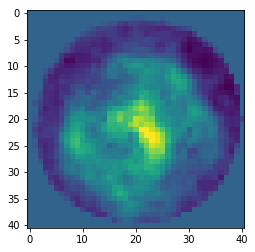

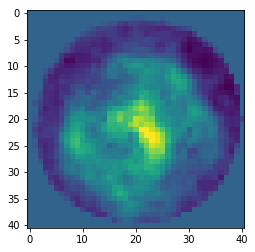

In [18]:
patch_red=np.array(patch,dtype=np.float32)
imshow(patch)
figure()
imshow(patch_red)

In [3]:
!ls -l /dev/shm/data/

total 2456588
-rw-rw-r-- 1 ubuntu ubuntu 1067381450 Oct  9 22:31 patches74.npz
-rw-rw-r-- 1 ubuntu ubuntu    6643312 Oct 19 23:56 permuted0.npz
-rw-rw-r-- 1 ubuntu ubuntu    7006408 Oct 19 23:56 permuted100.npz
-rw-rw-r-- 1 ubuntu ubuntu    7033304 Oct 19 23:56 permuted101.npz
-rw-rw-r-- 1 ubuntu ubuntu    6925720 Oct 19 23:56 permuted102.npz
-rw-rw-r-- 1 ubuntu ubuntu    7396400 Oct 19 23:56 permuted103.npz
-rw-rw-r-- 1 ubuntu ubuntu    7315712 Oct 19 23:56 permuted104.npz
-rw-rw-r-- 1 ubuntu ubuntu    7423296 Oct 19 23:56 permuted105.npz
-rw-rw-r-- 1 ubuntu ubuntu    7127440 Oct 19 23:56 permuted106.npz
-rw-rw-r-- 1 ubuntu ubuntu    6952616 Oct 19 23:56 permuted107.npz
-rw-rw-r-- 1 ubuntu ubuntu    7261920 Oct 19 23:56 permuted108.npz
-rw-rw-r-- 1 ubuntu ubuntu    6710552 Oct 19 23:56 permuted109.npz
-rw-rw-r-- 1 ubuntu ubuntu    6966064 Oct 19 23:56 permuted10.npz
-rw-rw-r-- 1 ubuntu ubuntu    6804688 Oct 19 23:56 permuted110.npz
-rw-rw-r-- 1 ubuntu ubuntu    7557776 Oct 19 23:56 pe

In [4]:
K=200
_size=41
stem='/dev/shm/data/permuted'
fp=[]
for i in range(K):
    fp.append(open(stem+str(i)+'.npz','bw'))

In [5]:
type(fp[0])

_io.BufferedWriter

In [6]:
for i in range(patches.shape[0]):
    j=np.random.randint(K)
    patch=patches[i,:,:]
    patch.tofile(fp[j])
    #imshow(patch)
    #break
    #print(i,j,fp_i[j])
    if i%1000==0:
        print('\r',i,end='')

 107000

In [7]:
for handle in fp:
    handle.close()

In [63]:
!ls -l /dev/shm/data/

total 2456588
-rw-rw-r-- 1 ubuntu ubuntu 1067381450 Oct  9 22:31 patches74.npz
-rw-rw-r-- 1 ubuntu ubuntu    6643312 Oct 19 23:56 permuted0.npz
-rw-rw-r-- 1 ubuntu ubuntu    7006408 Oct 19 23:56 permuted100.npz
-rw-rw-r-- 1 ubuntu ubuntu    7033304 Oct 19 23:56 permuted101.npz
-rw-rw-r-- 1 ubuntu ubuntu    6925720 Oct 19 23:56 permuted102.npz
-rw-rw-r-- 1 ubuntu ubuntu    7396400 Oct 19 23:56 permuted103.npz
-rw-rw-r-- 1 ubuntu ubuntu    7315712 Oct 19 23:56 permuted104.npz
-rw-rw-r-- 1 ubuntu ubuntu    7423296 Oct 19 23:56 permuted105.npz
-rw-rw-r-- 1 ubuntu ubuntu    7127440 Oct 19 23:56 permuted106.npz
-rw-rw-r-- 1 ubuntu ubuntu    6952616 Oct 19 23:56 permuted107.npz
-rw-rw-r-- 1 ubuntu ubuntu    7261920 Oct 19 23:56 permuted108.npz
-rw-rw-r-- 1 ubuntu ubuntu    6710552 Oct 19 23:56 permuted109.npz
-rw-rw-r-- 1 ubuntu ubuntu    6966064 Oct 19 23:56 permuted10.npz
-rw-rw-r-- 1 ubuntu ubuntu    6804688 Oct 19 23:56 permuted110.npz
-rw-rw-r-- 1 ubuntu ubuntu    7557776 Oct 19 23:56 pe

0 (1681,)
1 (1681,)
2 (1681,)
3 (1681,)
4 (1681,)
5 (1681,)
6 (1681,)
7 (1681,)
8 (1681,)
9 (1681,)
10 (1681,)
11 (1681,)
12 (1681,)
13 (1681,)
14 (1681,)
15 (1681,)
16 (1681,)
17 (1681,)
18 (1681,)
19 (1681,)
20 (1681,)


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


21 (1681,)
22 (1681,)
23 (1681,)
24 (1681,)
25 (1681,)
26 (1681,)
27 (1681,)
28 (1681,)
29 (1681,)
30 (1681,)
31 (1681,)
32 (1681,)
33 (1681,)
34 (1681,)
35 (1681,)
36 (1681,)
37 (1681,)
38 (1681,)
39 (1681,)
40 (1681,)
41 (1681,)
42 (1681,)
43 (1681,)
44 (1681,)
45 (1681,)
46 (1681,)
47 (1681,)
48 (1681,)
49 (1681,)
50 (1681,)
51 (1681,)
52 (1681,)
53 (1681,)
54 (1681,)
55 (1681,)
56 (1681,)
57 (1681,)
58 (1681,)
59 (1681,)
60 (1681,)
61 (1681,)
62 (1681,)
63 (1681,)
64 (1681,)
65 (1681,)
66 (1681,)
67 (1681,)
68 (1681,)
69 (1681,)
70 (1681,)
71 (1681,)
72 (1681,)
73 (1681,)
74 (1681,)
75 (1681,)
76 (1681,)
77 (1681,)
78 (1681,)
79 (1681,)
80 (1681,)
81 (1681,)
82 (1681,)
83 (1681,)
84 (1681,)
85 (1681,)
86 (1681,)
87 (1681,)
88 (1681,)
89 (1681,)
90 (1681,)
91 (1681,)
92 (1681,)
93 (1681,)
94 (1681,)
95 (1681,)
96 (1681,)
97 (1681,)
98 (1681,)
99 (1681,)
100 (1681,)
101 (1681,)
102 (1681,)
103 (1681,)
104 (1681,)
105 (1681,)
106 (1681,)
107 (1681,)
108 (1681,)
109 (1681,)
110 (1681,)

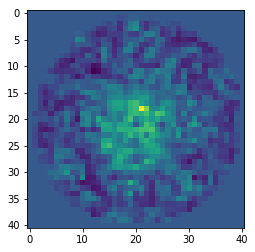

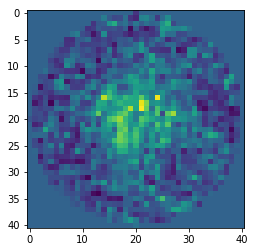

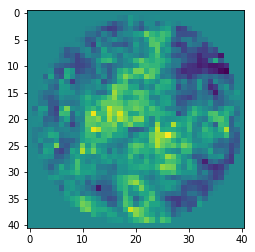

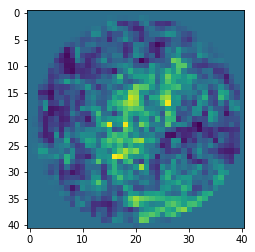

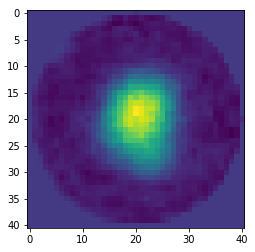

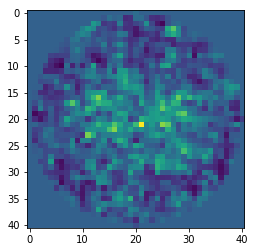

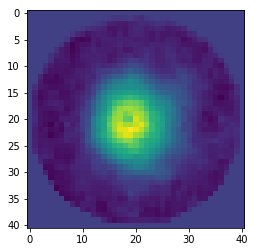

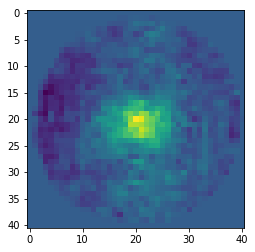

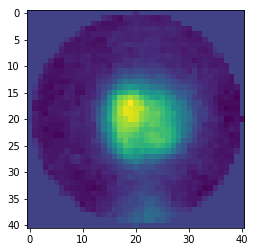

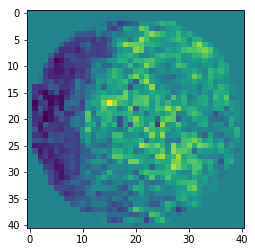

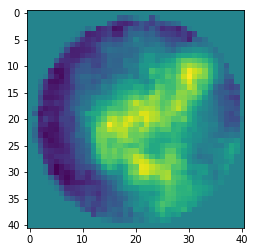

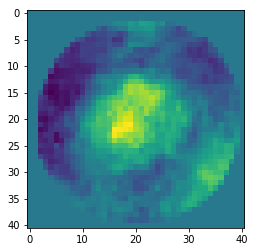

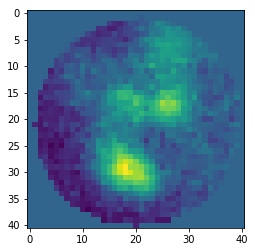

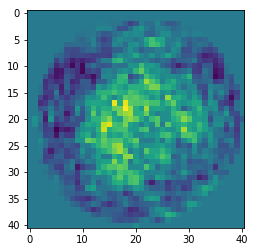

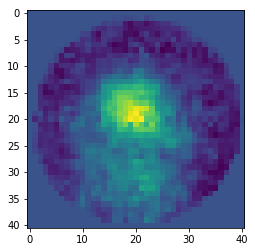

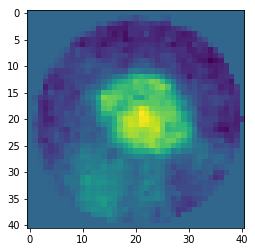

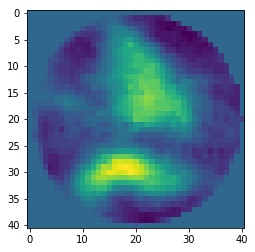

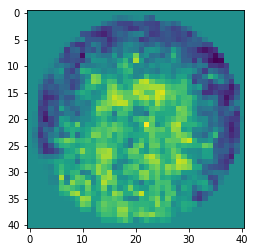

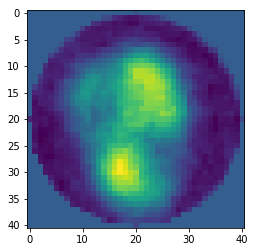

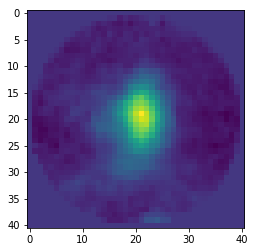

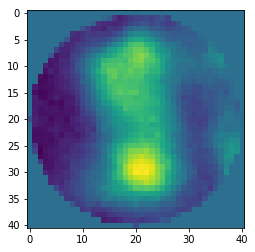

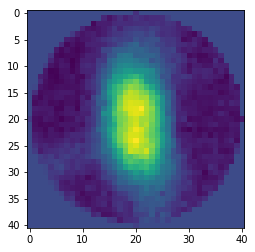

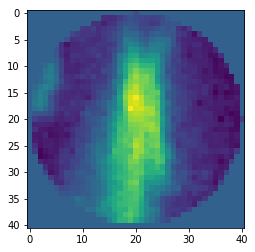

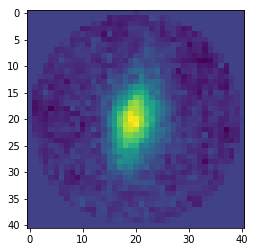

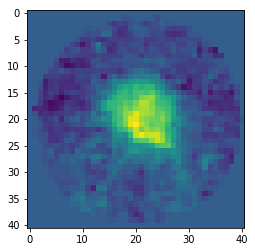

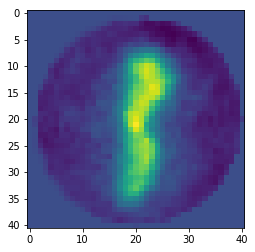

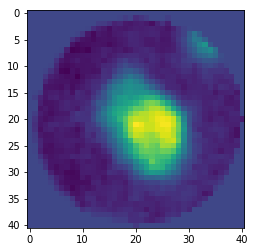

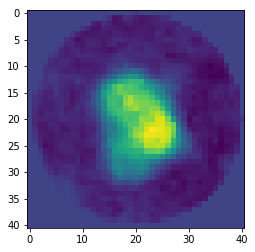

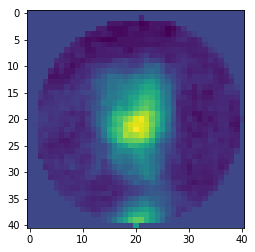

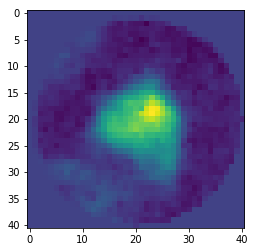

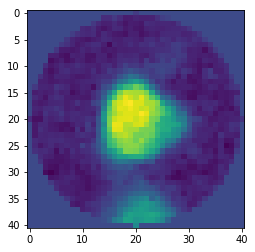

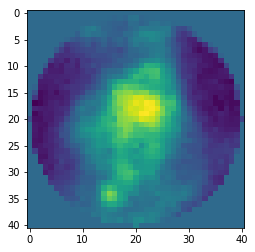

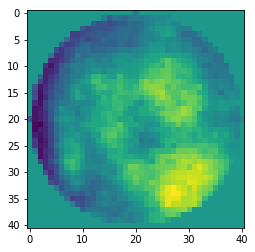

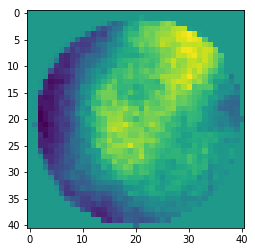

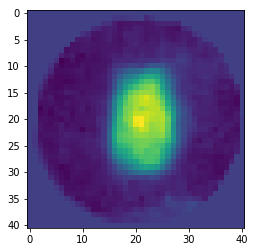

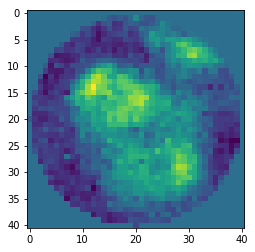

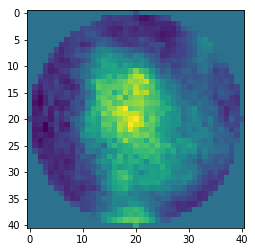

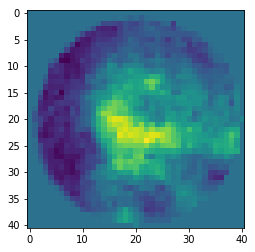

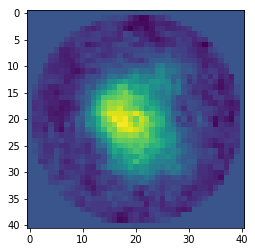

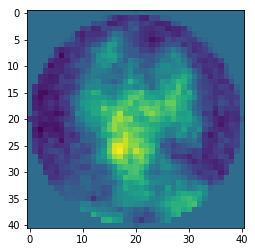

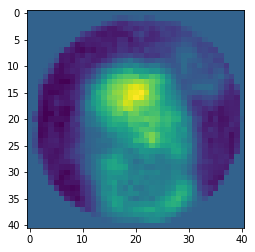

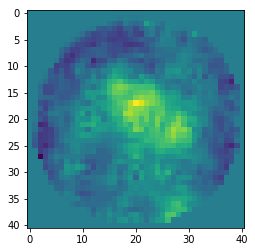

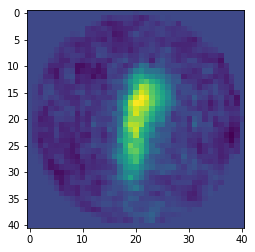

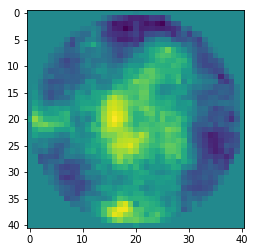

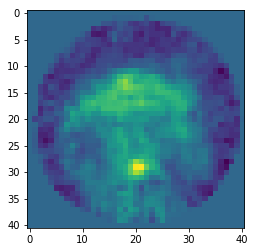

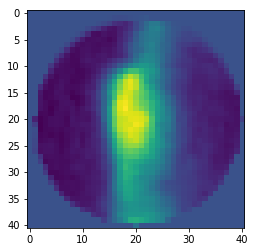

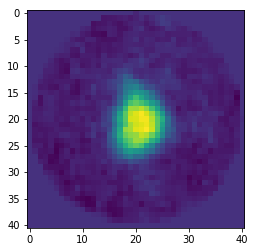

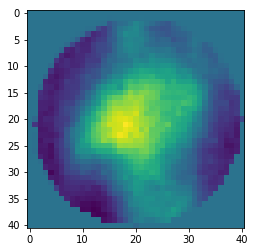

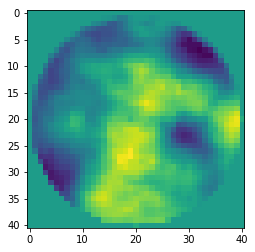

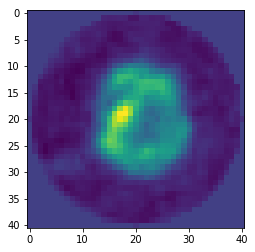

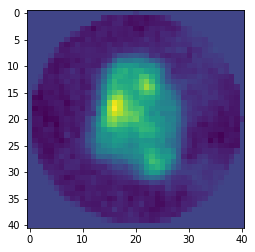

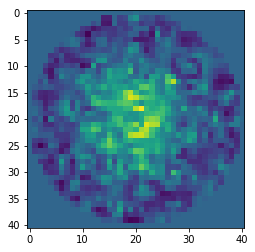

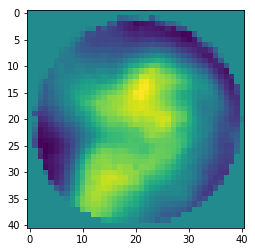

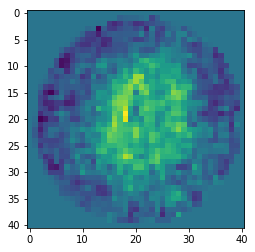

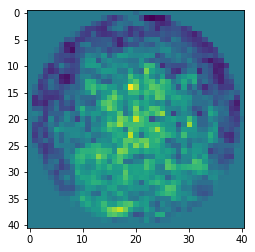

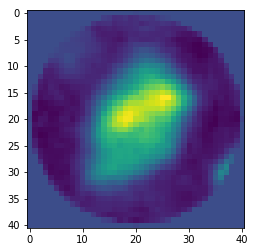

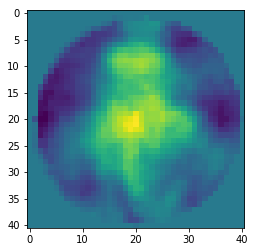

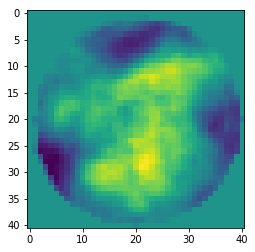

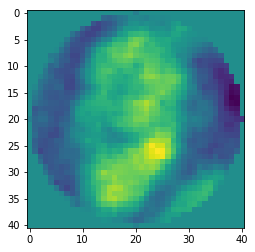

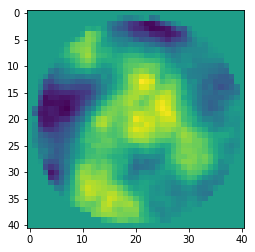

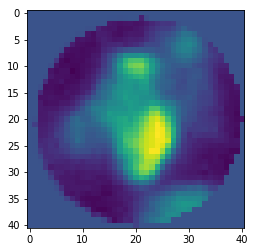

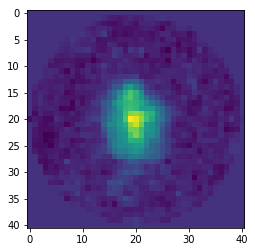

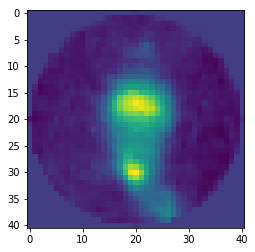

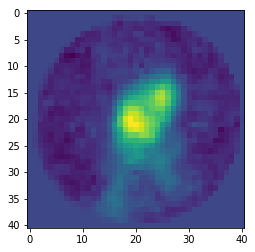

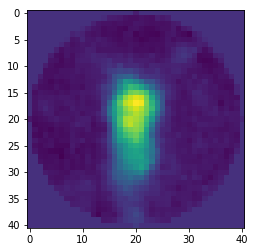

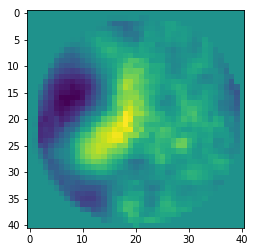

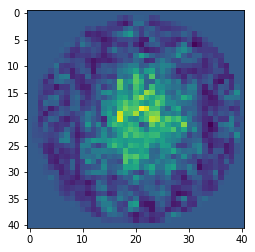

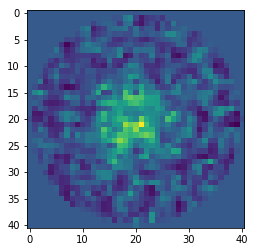

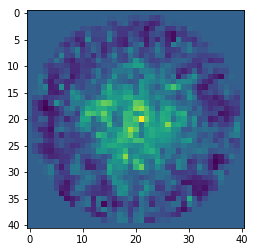

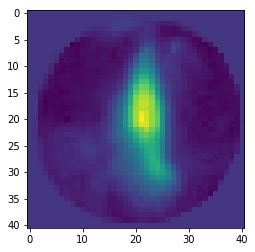

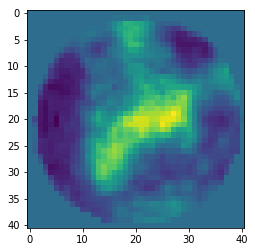

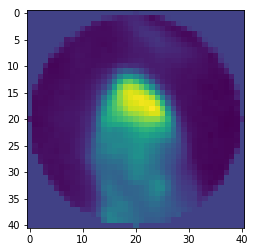

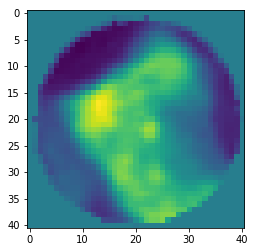

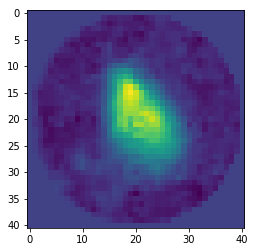

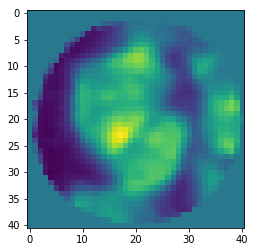

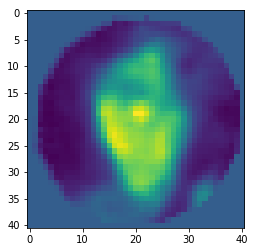

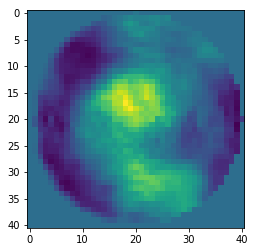

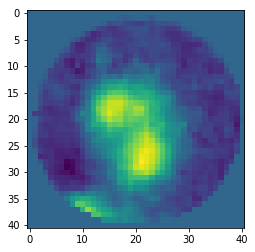

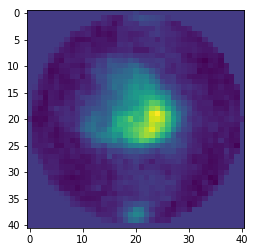

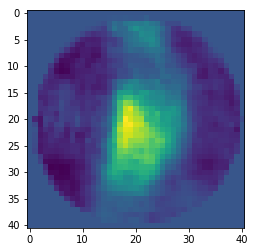

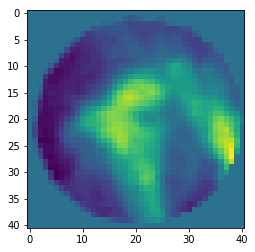

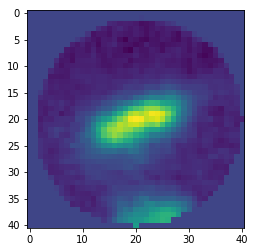

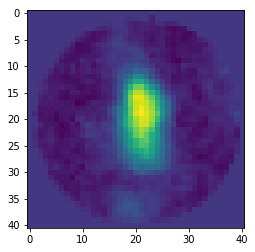

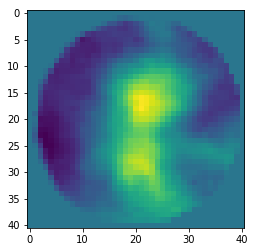

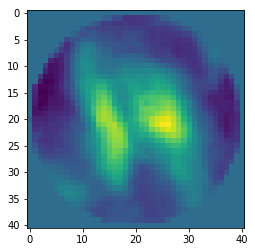

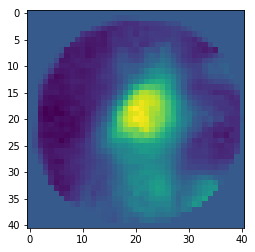

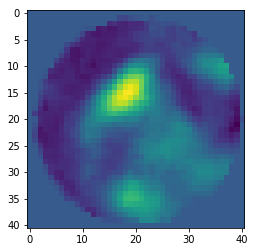

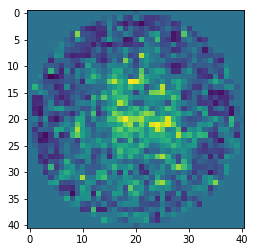

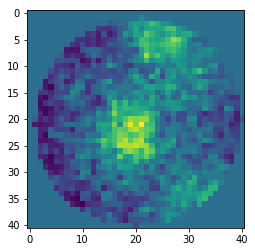

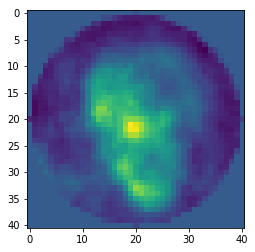

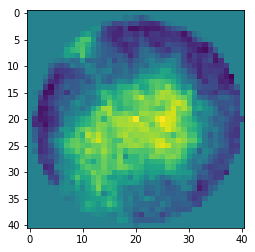

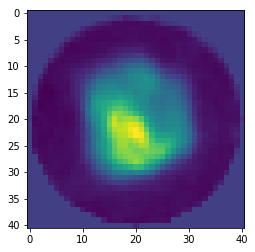

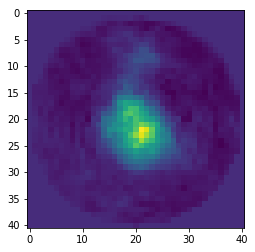

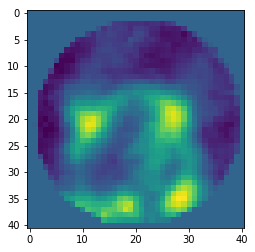

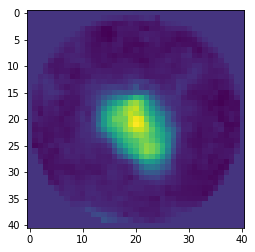

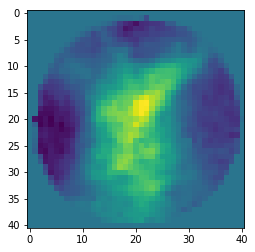

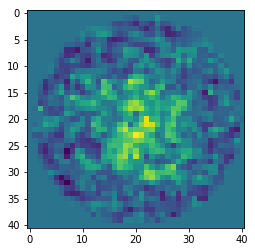

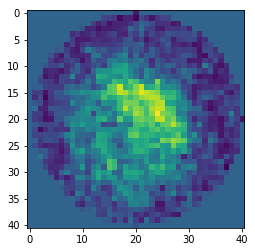

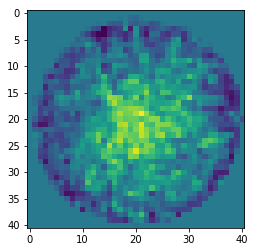

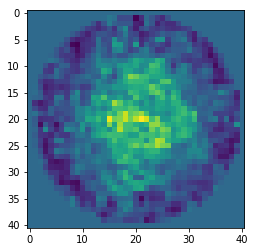

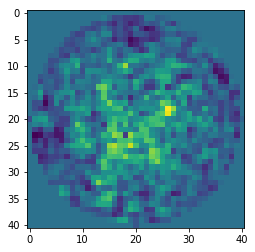

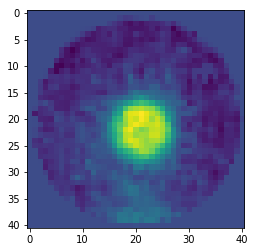

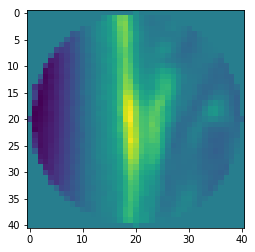

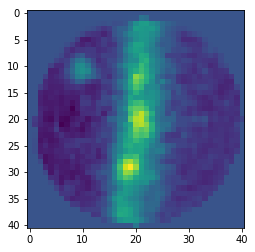

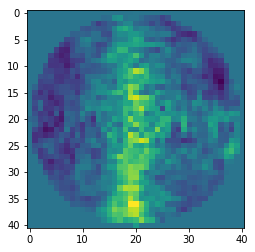

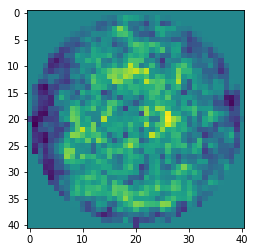

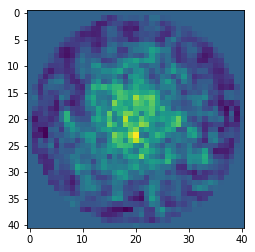

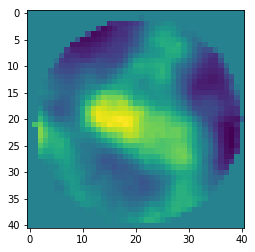

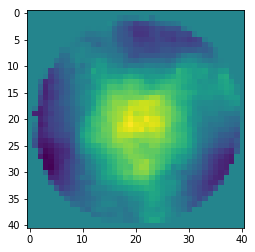

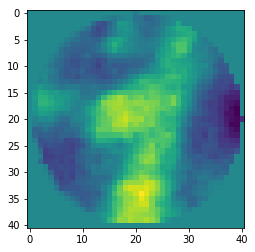

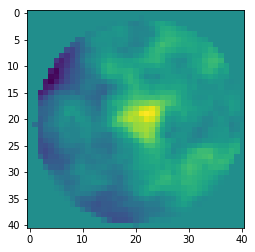

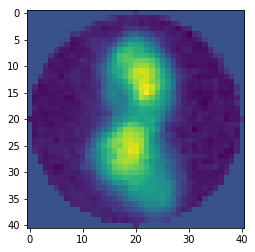

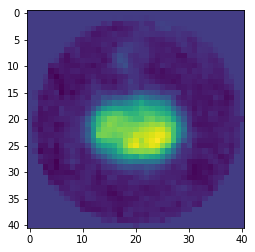

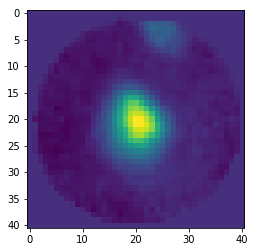

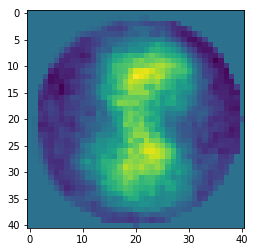

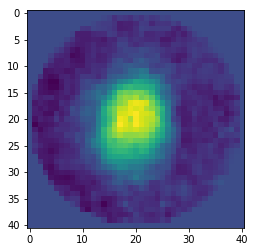

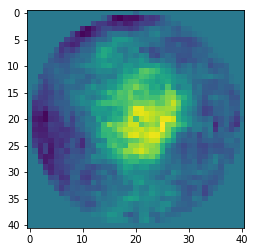

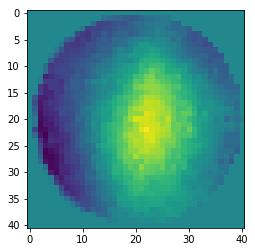

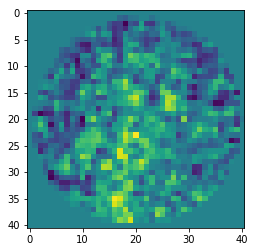

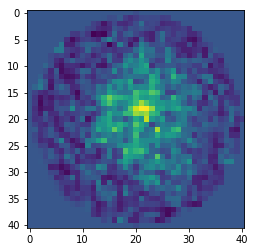

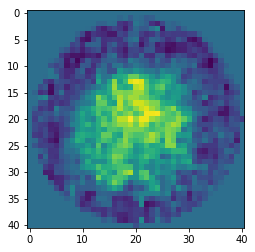

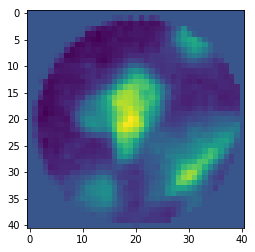

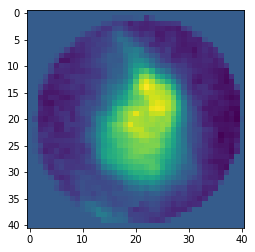

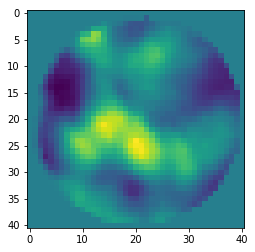

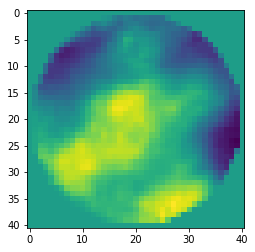

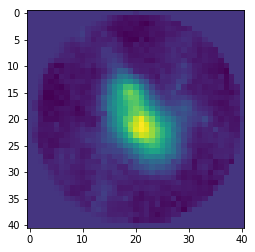

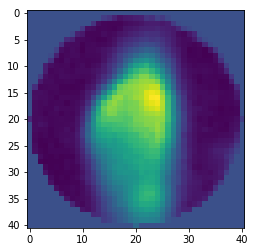

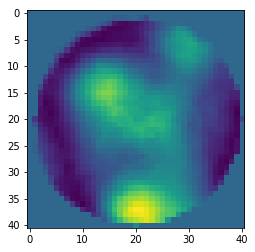

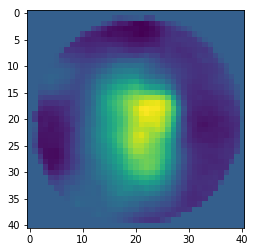

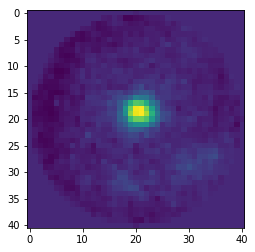

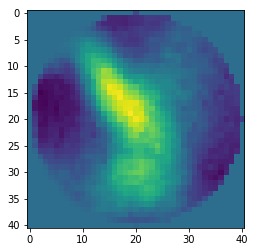

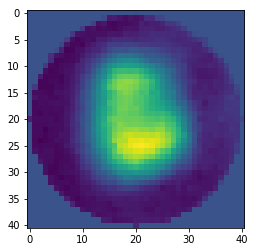

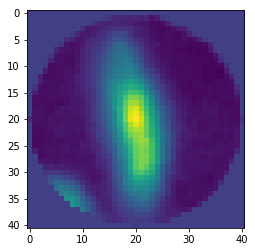

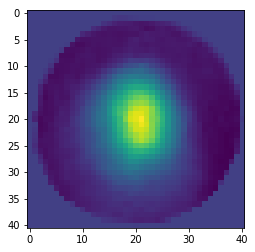

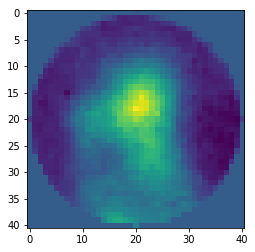

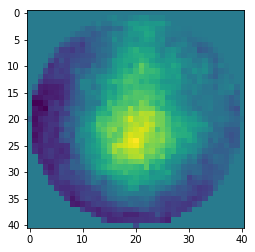

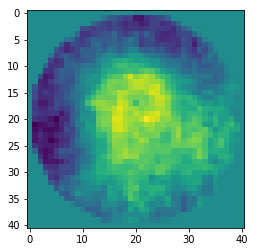

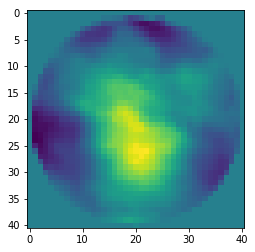

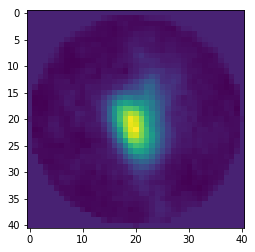

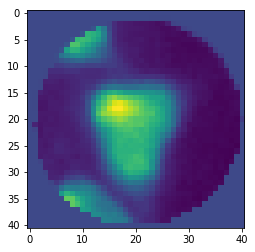

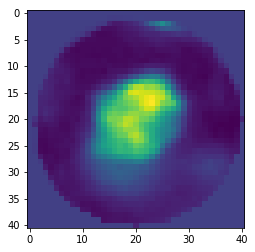

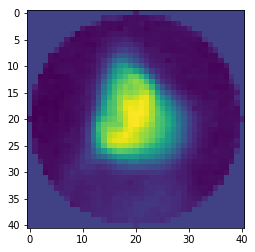

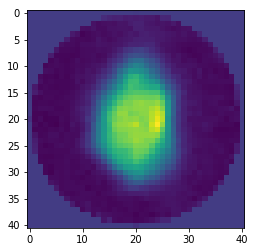

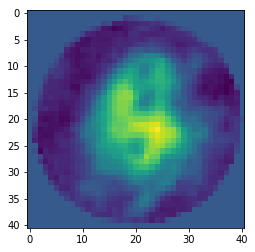

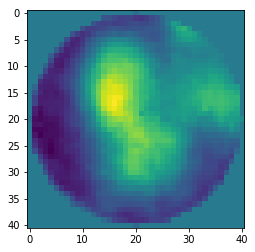

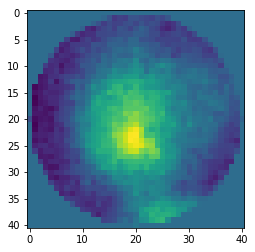

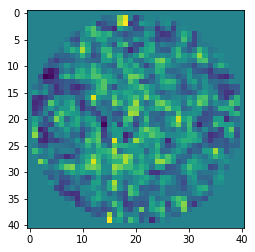

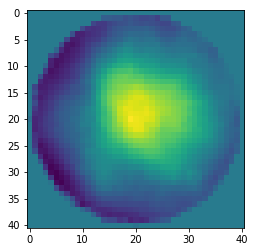

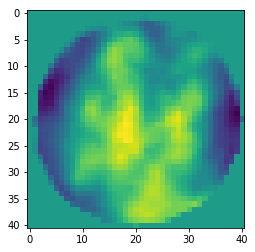

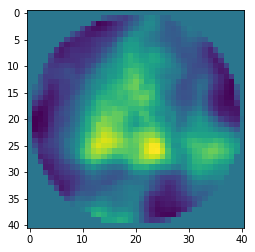

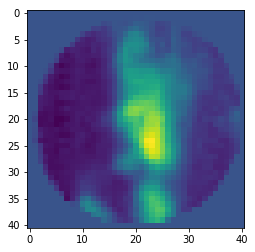

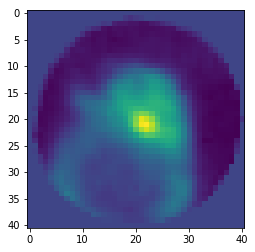

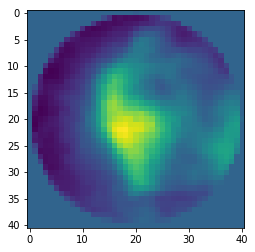

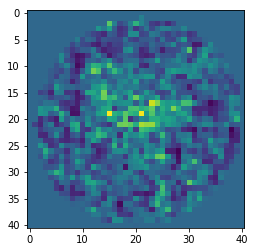

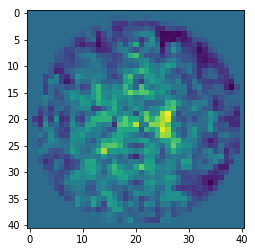

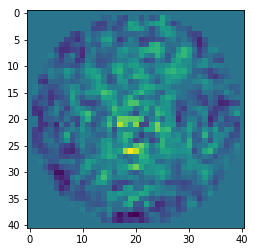

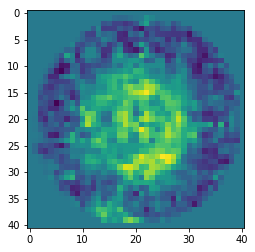

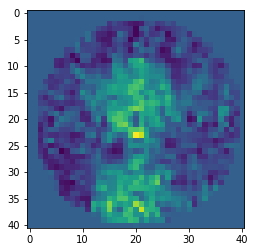

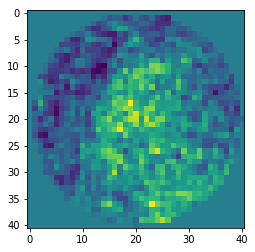

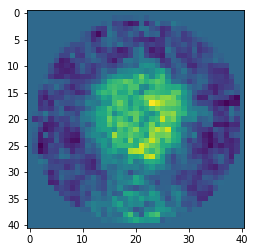

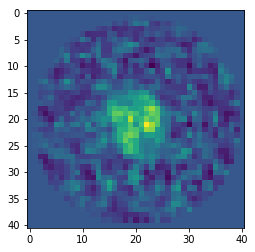

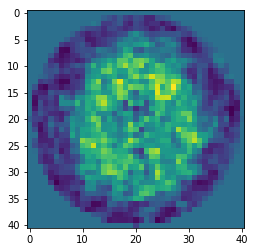

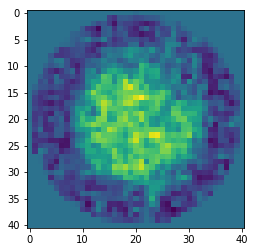

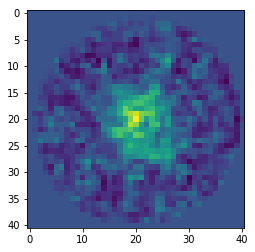

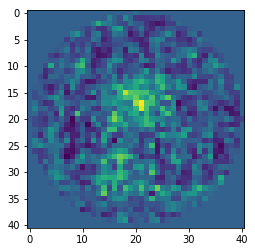

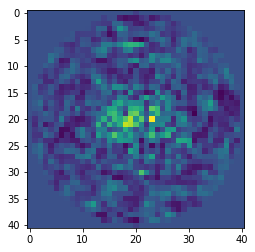

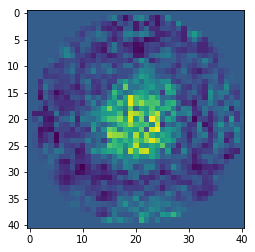

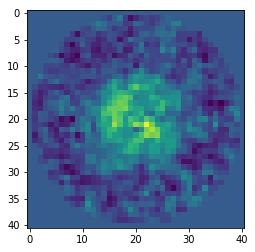

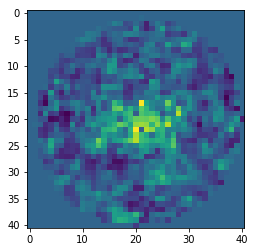

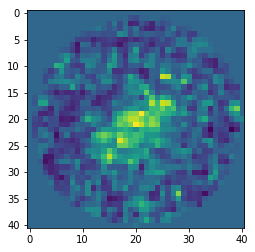

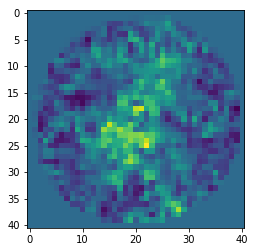

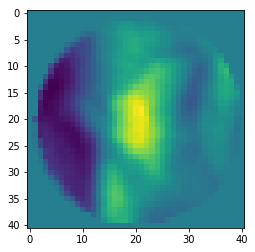

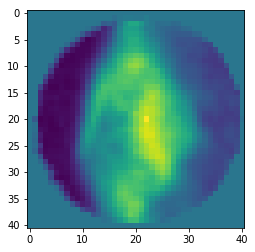

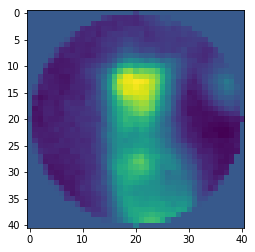

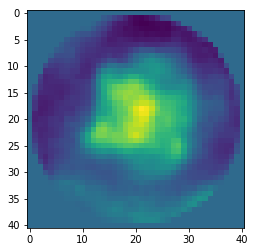

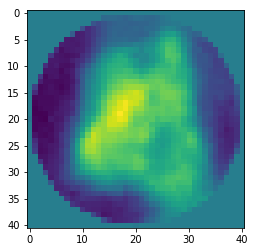

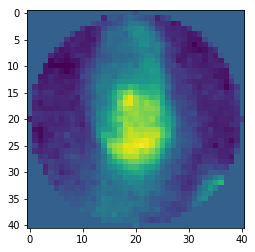

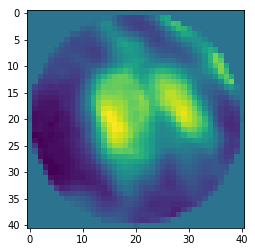

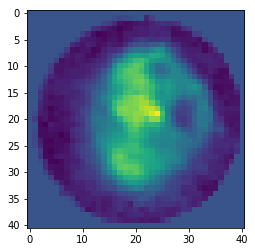

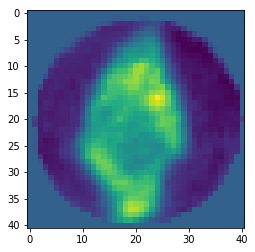

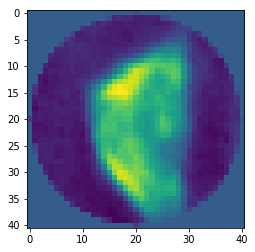

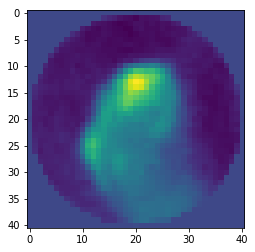

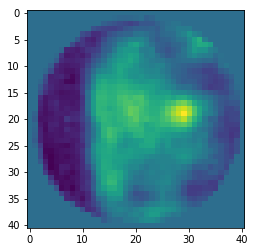

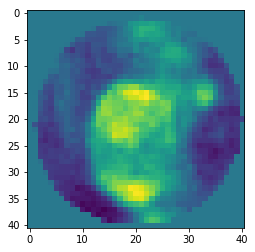

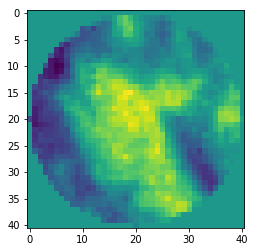

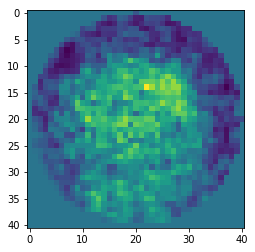

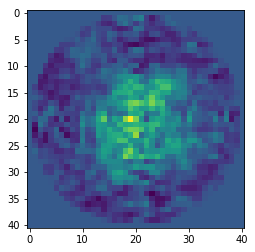

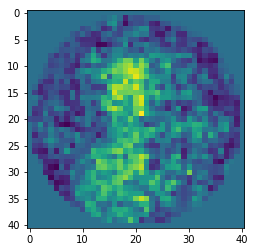

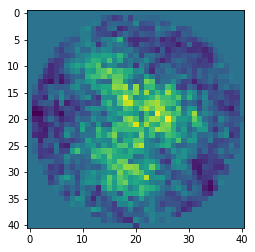

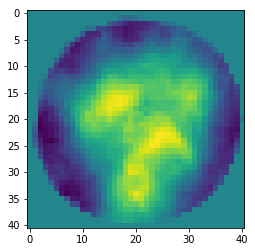

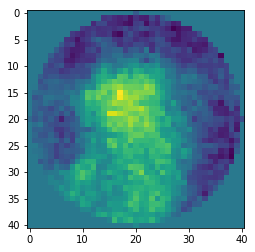

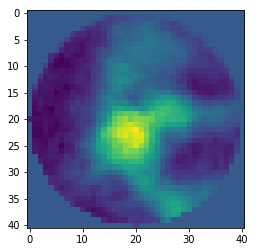

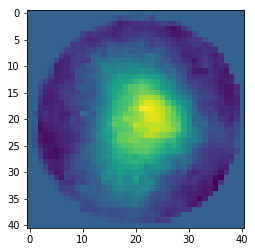

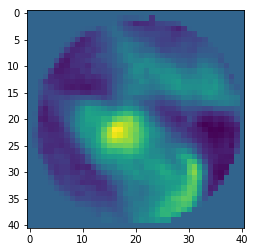

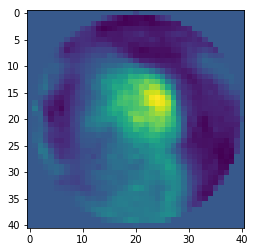

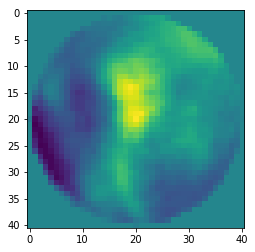

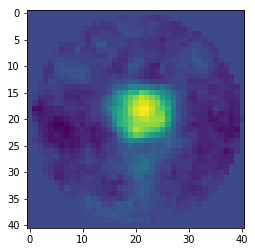

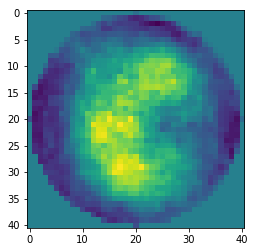

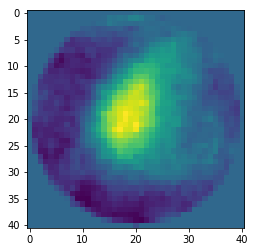

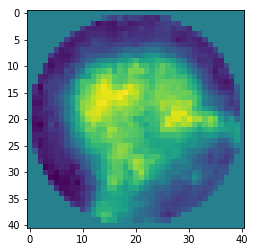

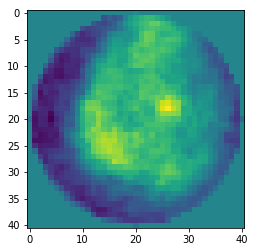

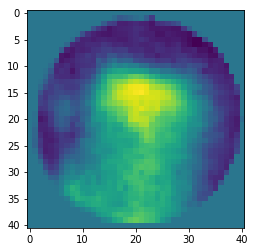

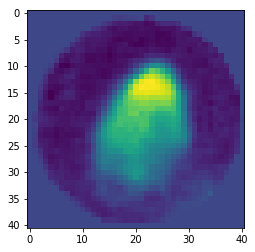

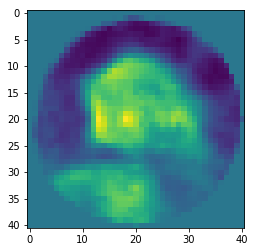

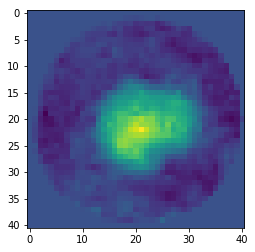

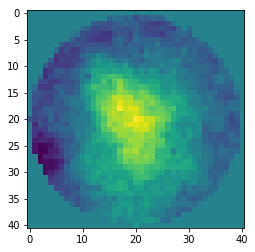

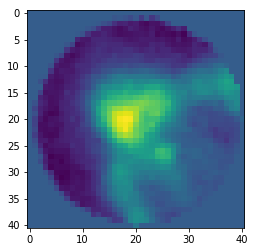

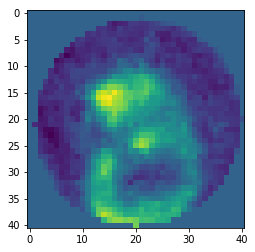

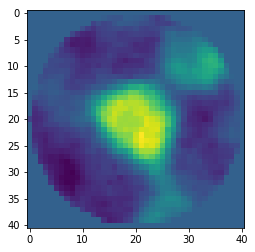

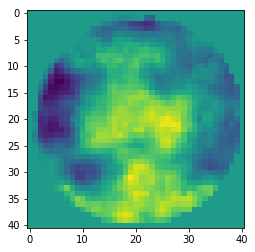

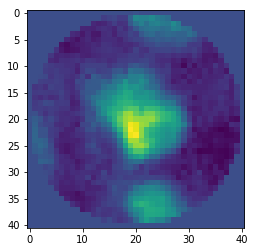

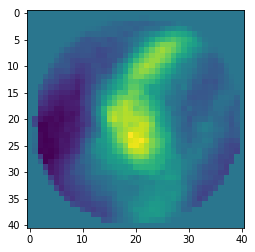

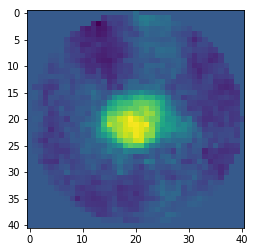

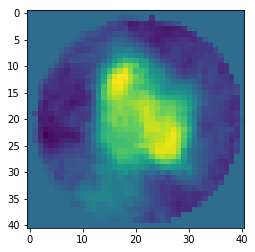

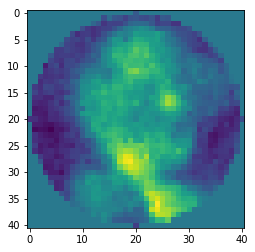

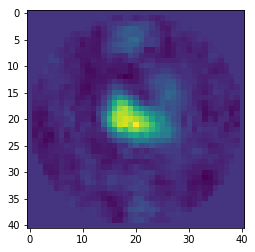

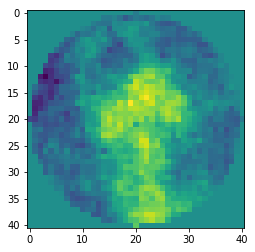

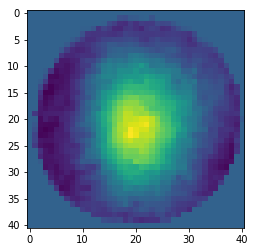

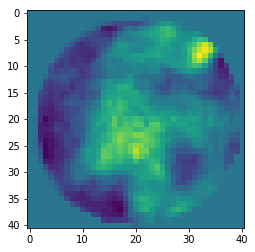

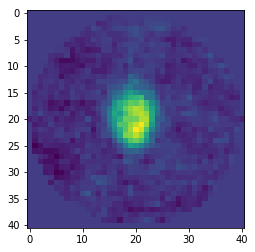

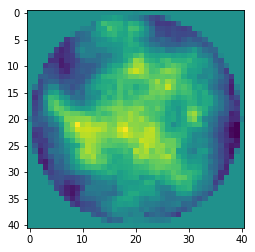

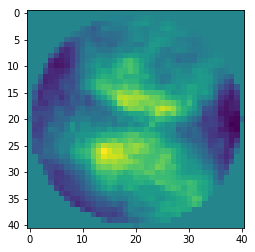

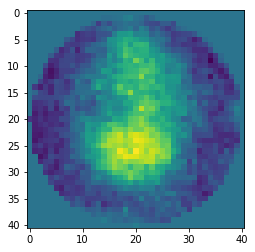

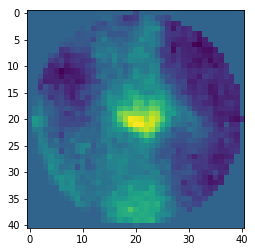

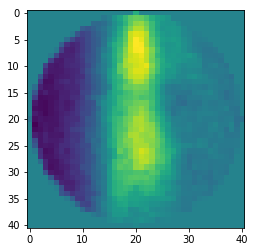

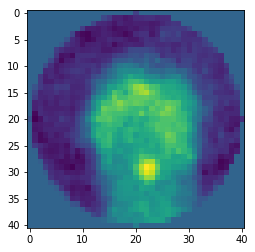

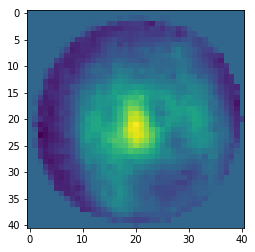

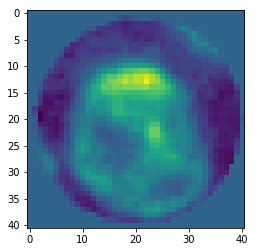

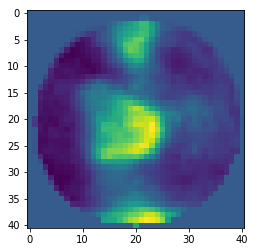

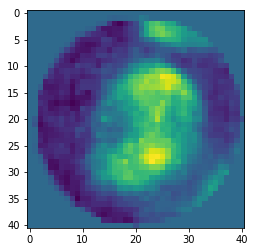

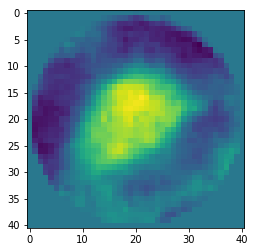

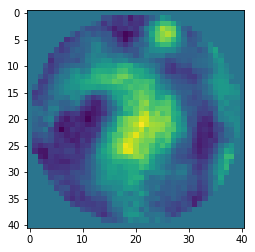

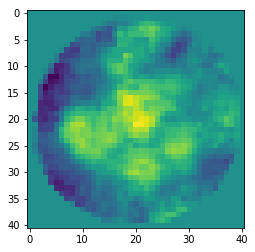

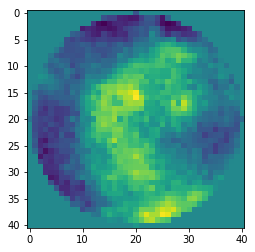

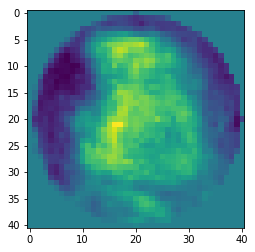

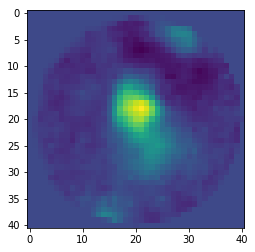

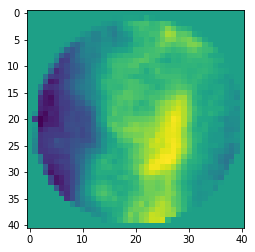

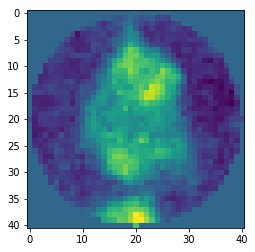

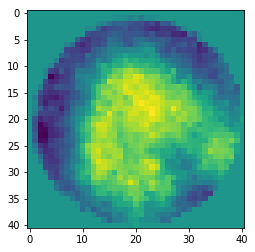

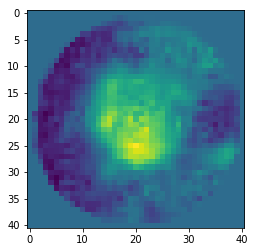

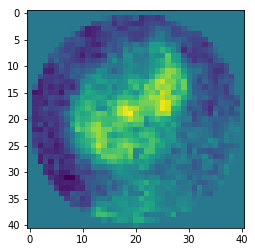

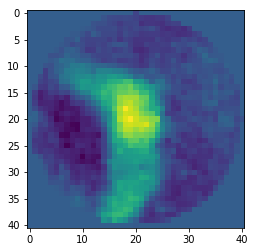

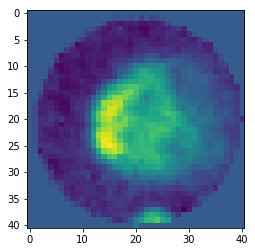

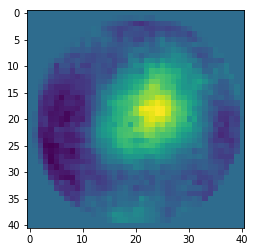

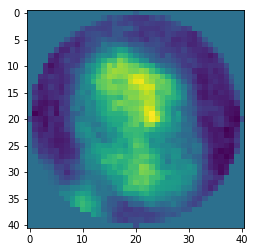

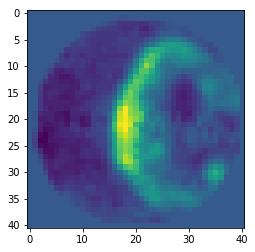

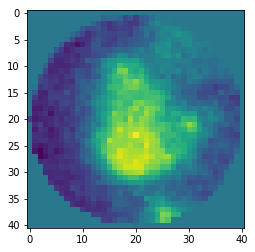

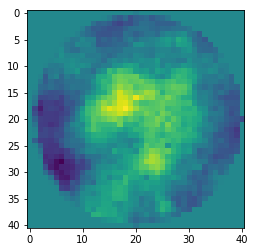

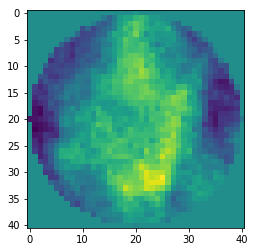

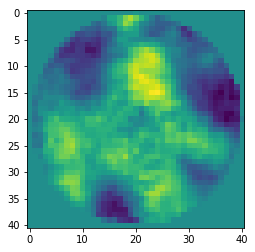

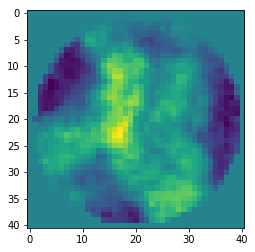

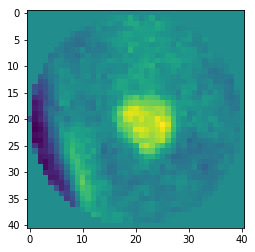

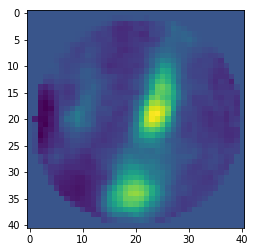

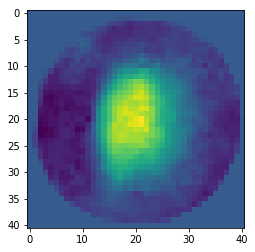

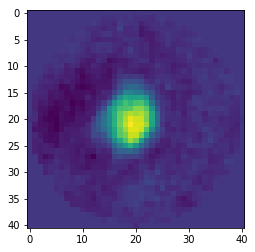

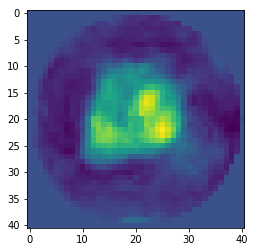

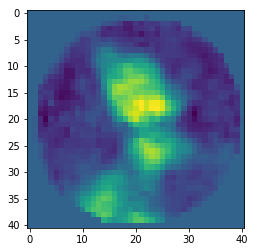

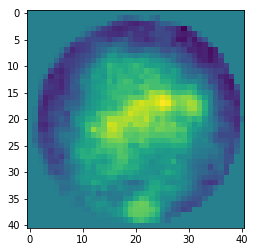

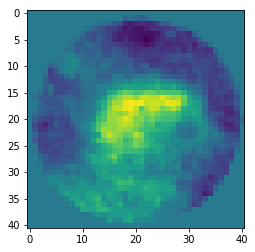

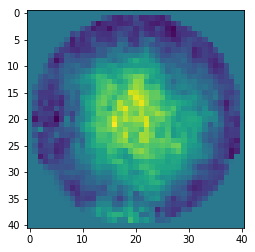

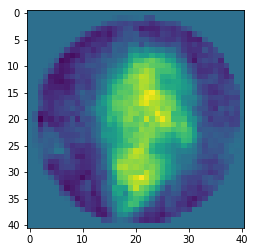

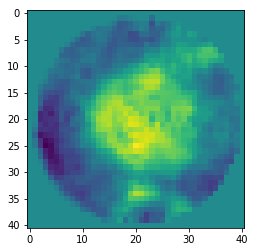

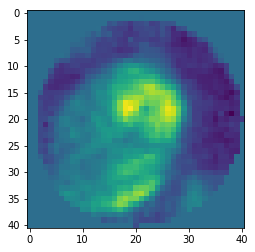

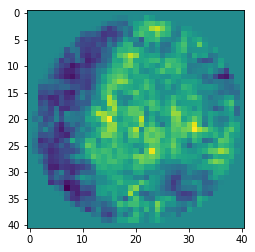

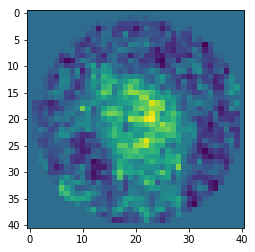

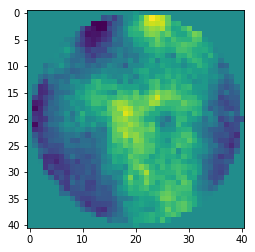

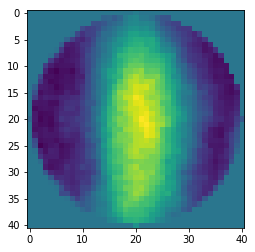

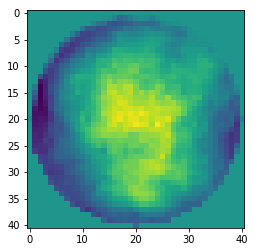

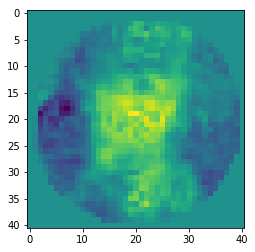

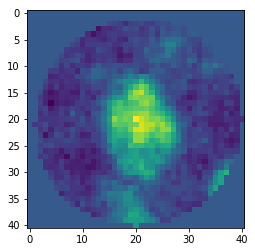

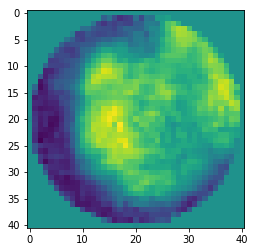

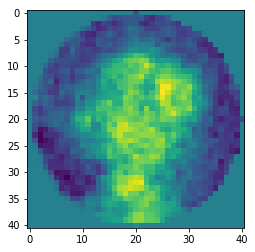

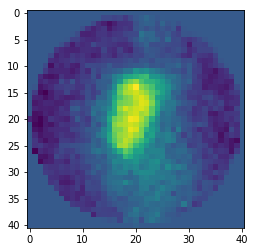

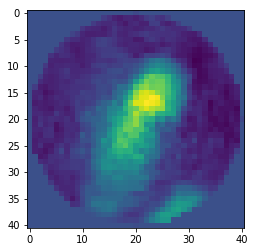

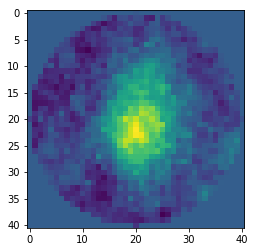

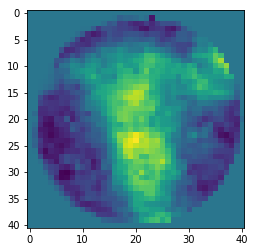

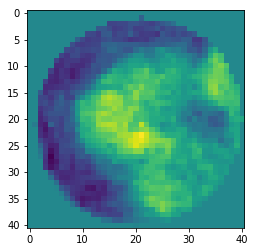

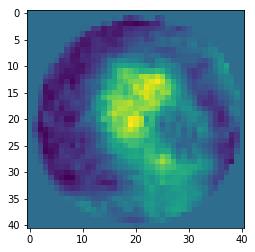

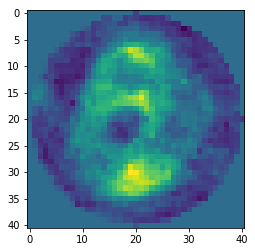

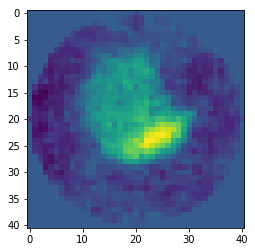

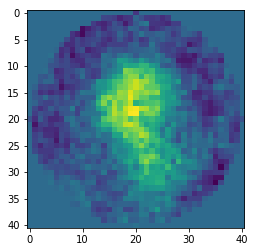

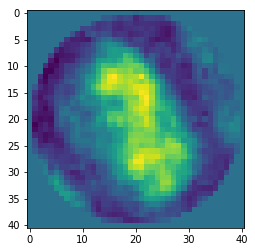

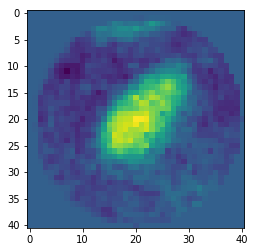

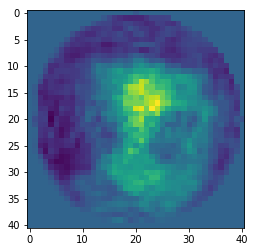

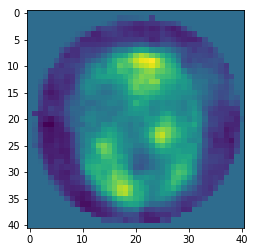

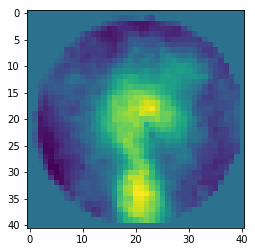

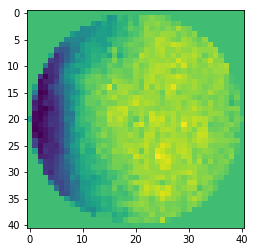

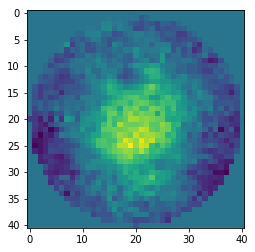

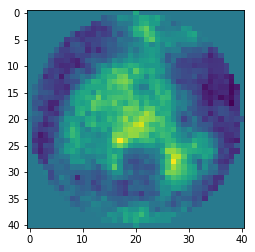

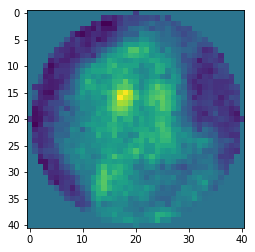

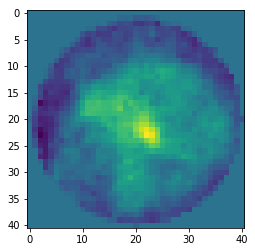

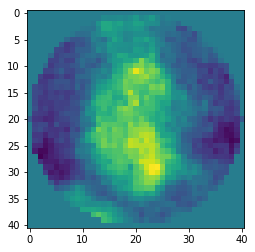

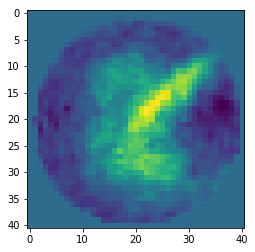

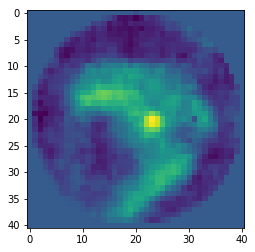

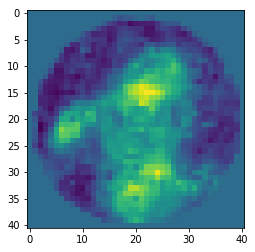

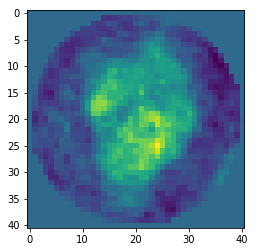

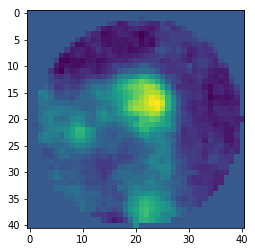

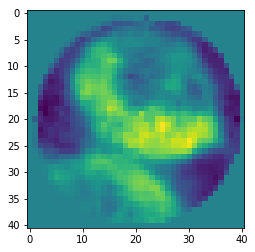

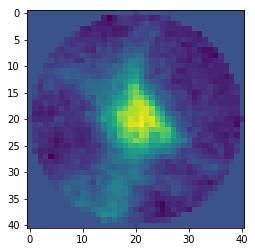

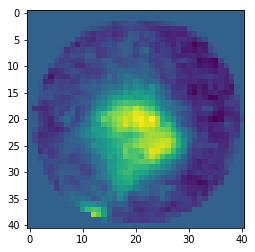

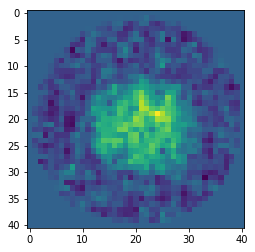

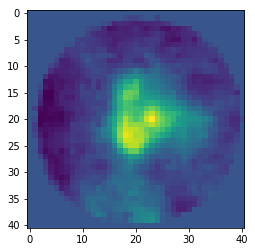

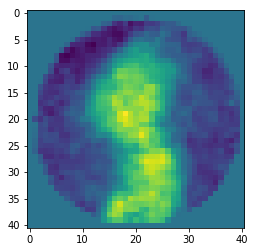

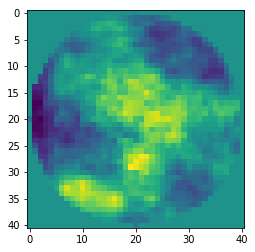

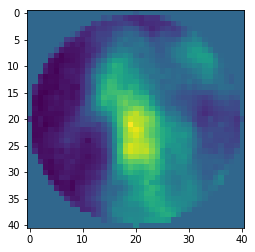

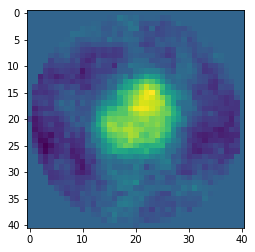

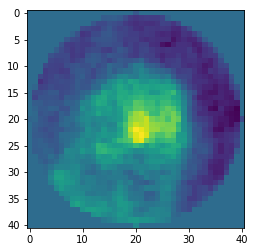

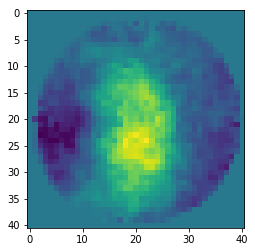

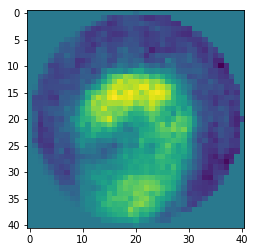

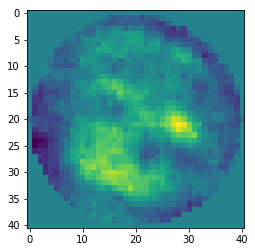

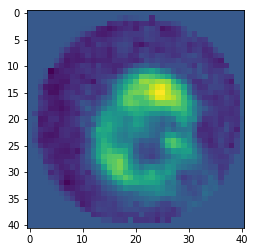

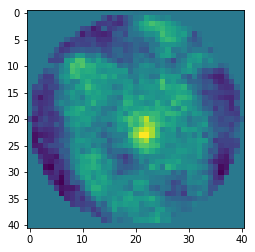

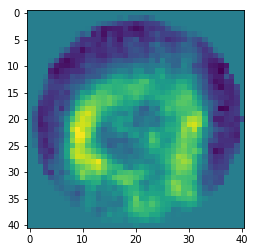

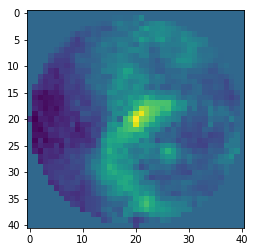

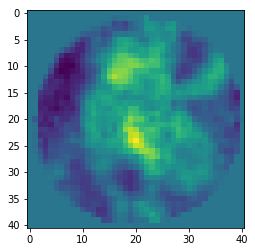

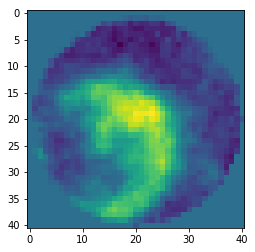

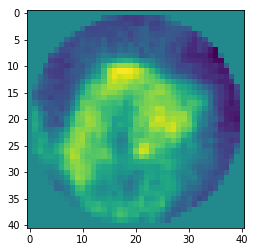

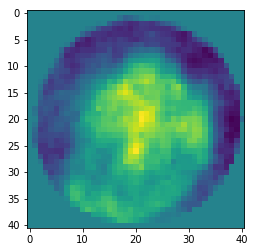

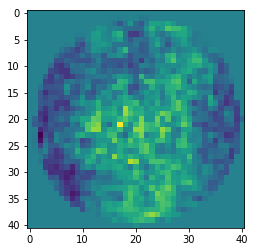

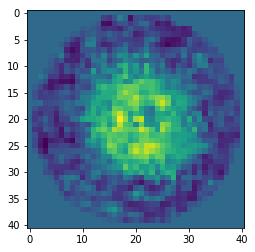

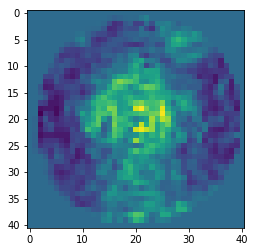

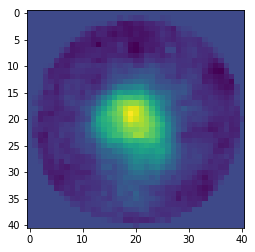

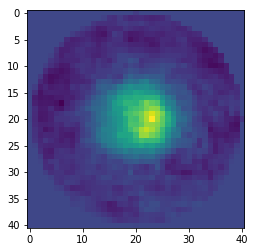

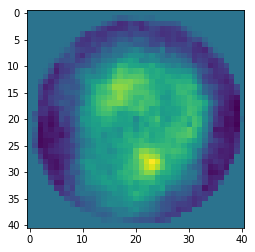

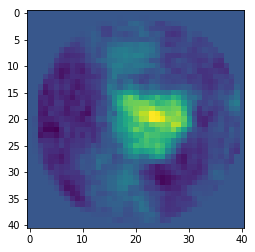

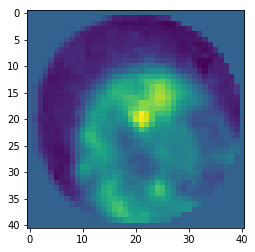

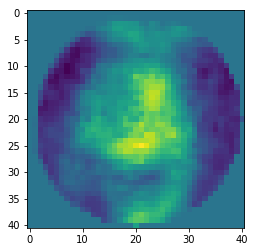

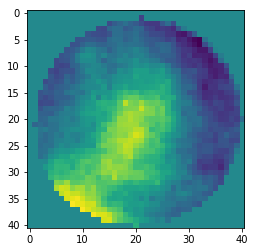

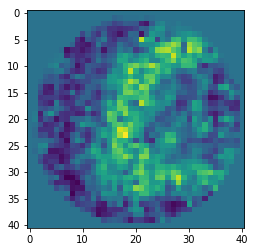

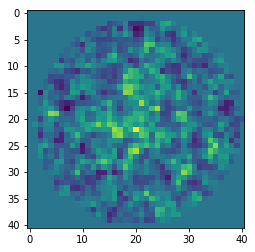

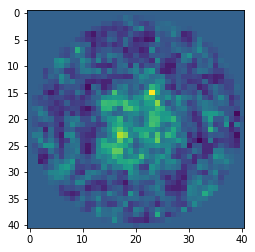

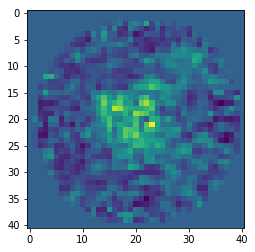

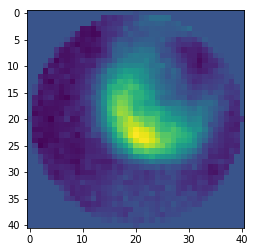

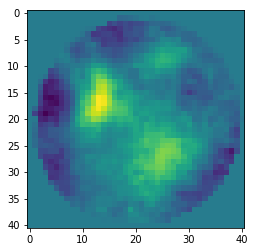

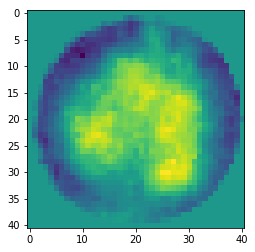

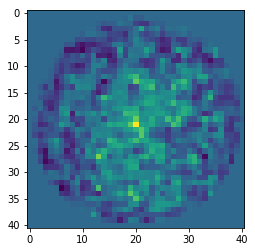

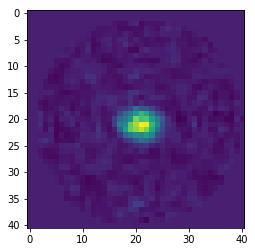

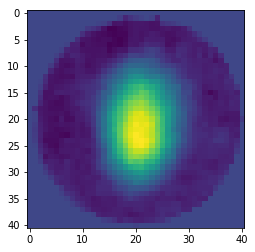

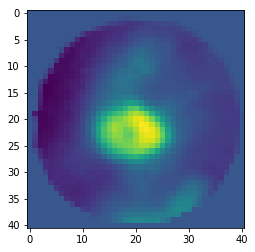

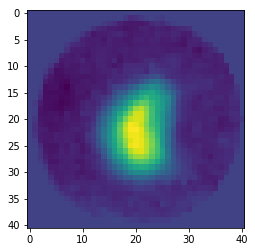

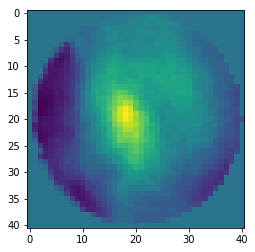

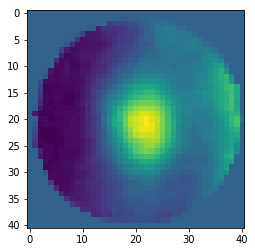

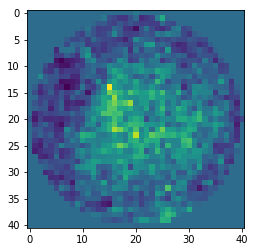

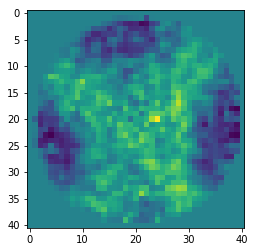

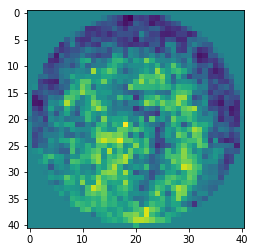

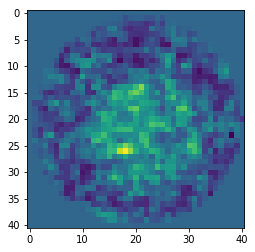

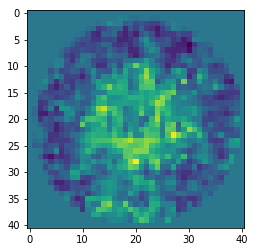

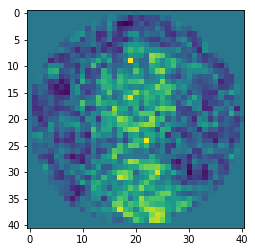

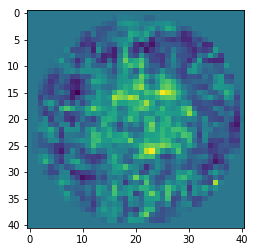

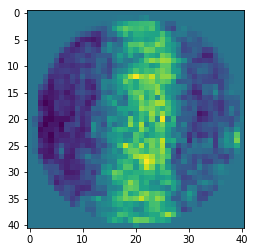

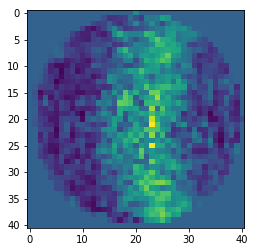

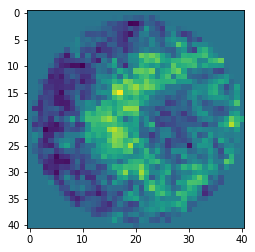

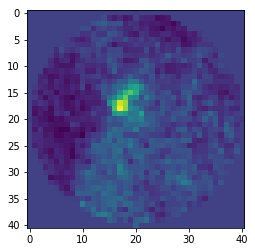

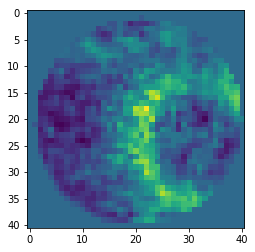

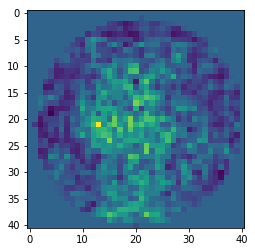

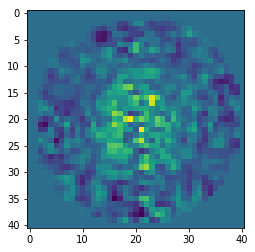

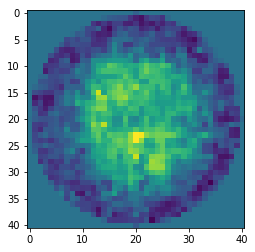

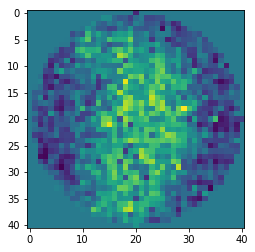

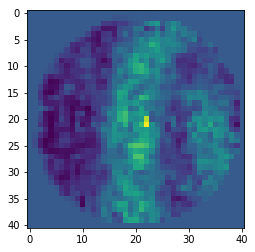

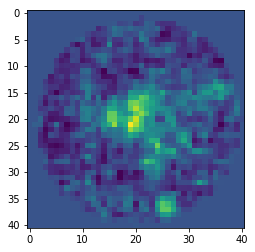

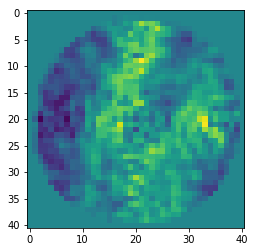

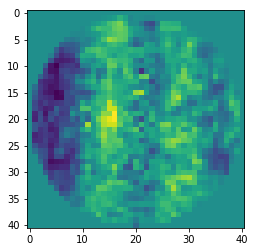

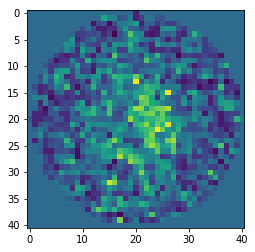

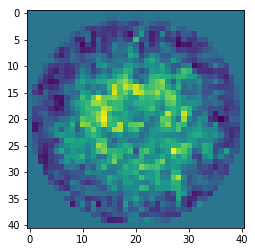

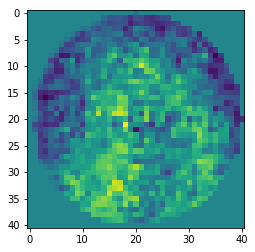

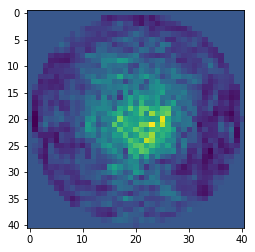

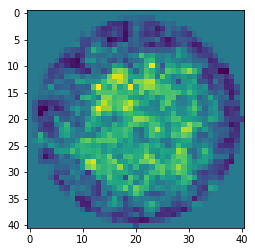

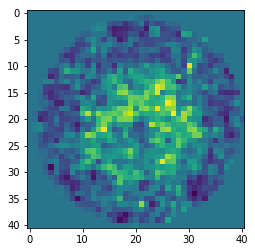

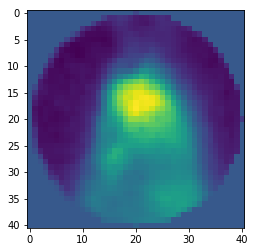

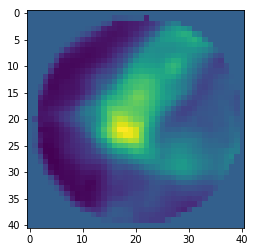

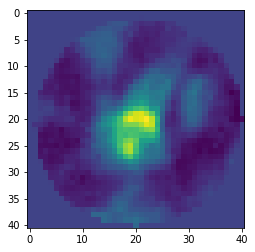

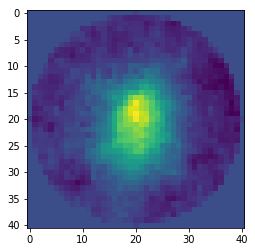

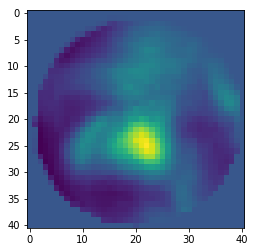

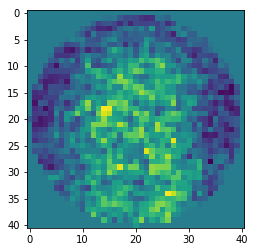

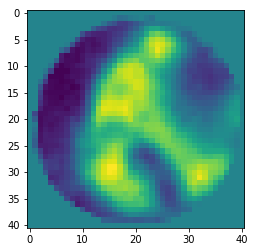

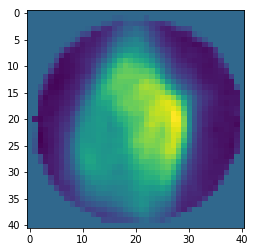

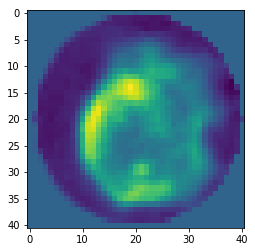

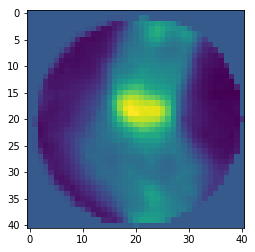

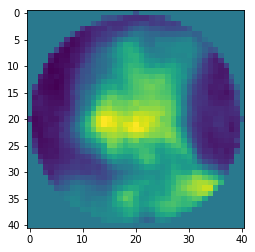

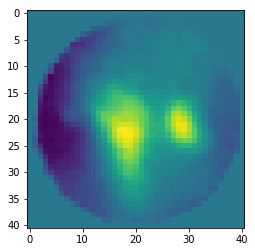

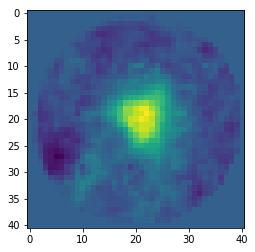

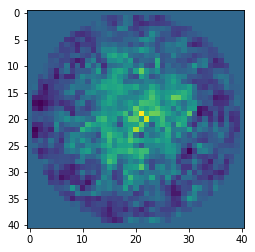

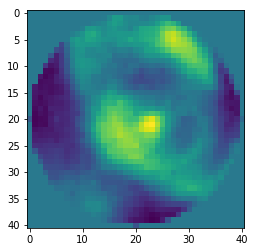

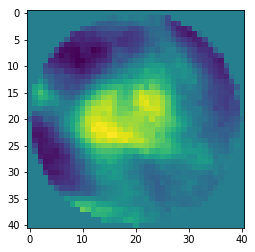

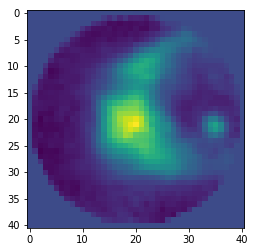

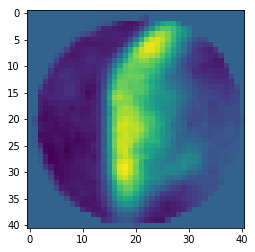

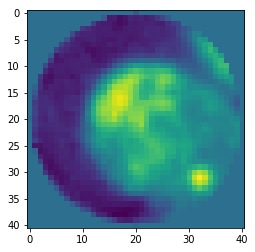

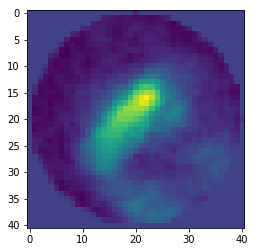

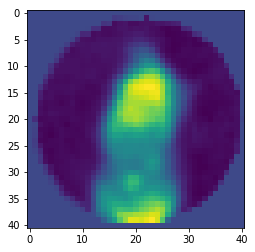

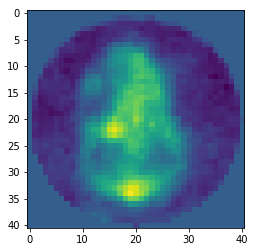

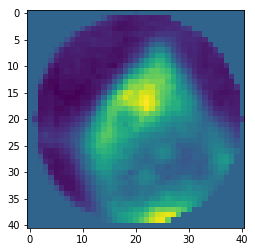

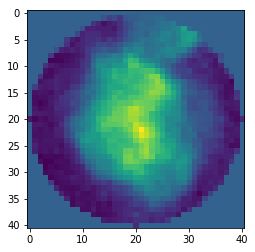

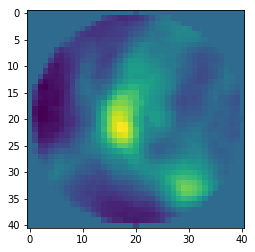

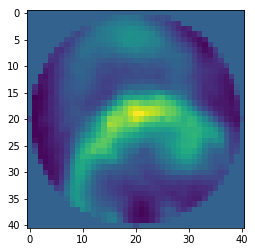

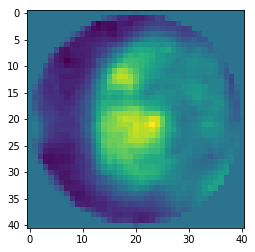

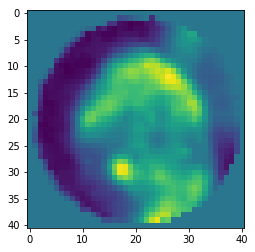

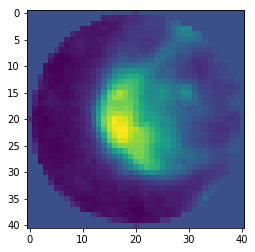

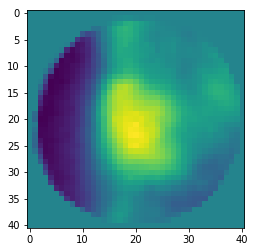

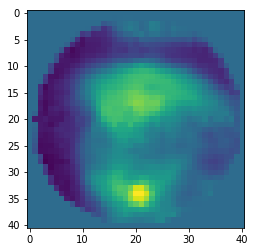

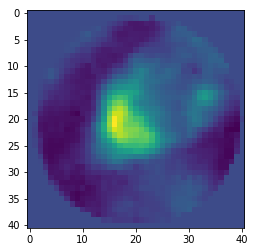

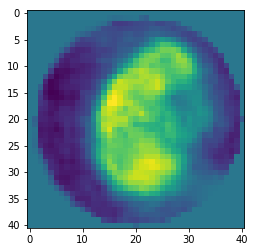

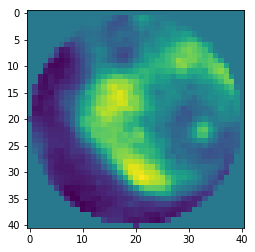

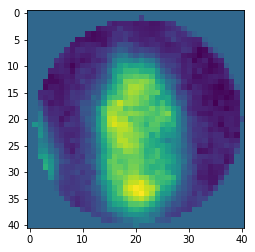

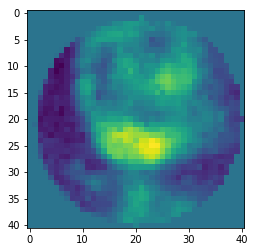

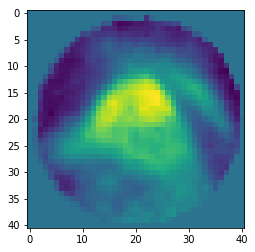

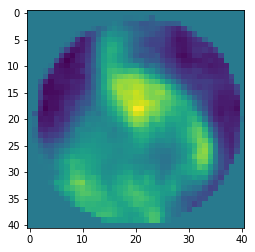

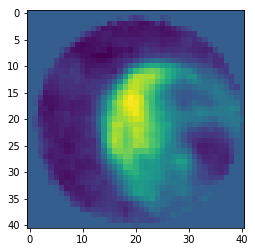

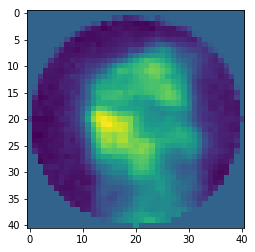

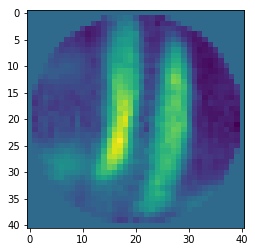

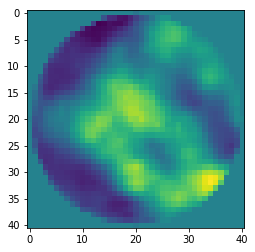

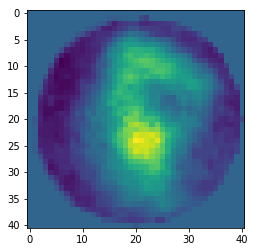

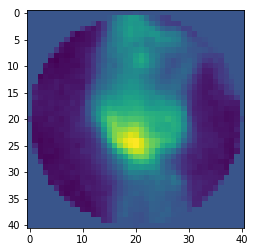

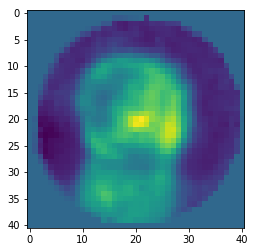

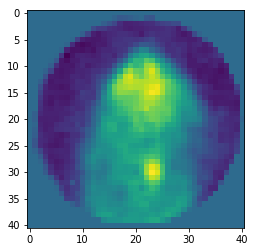

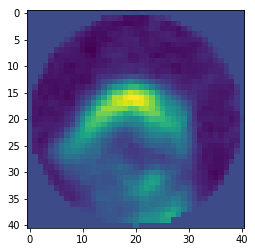

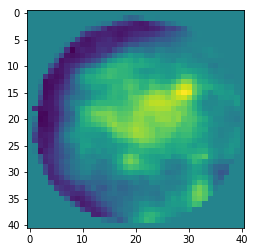

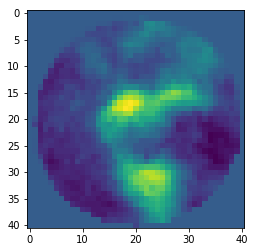

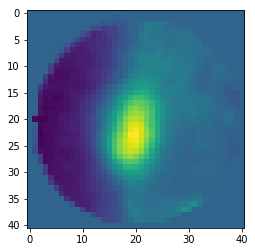

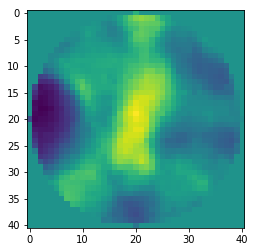

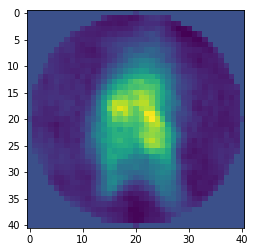

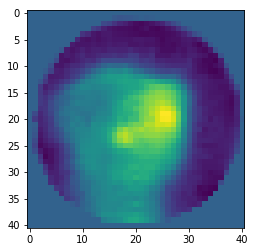

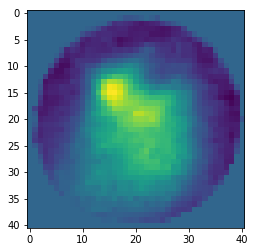

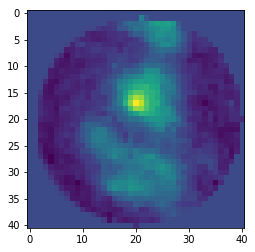

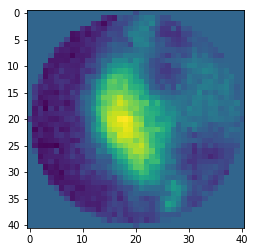

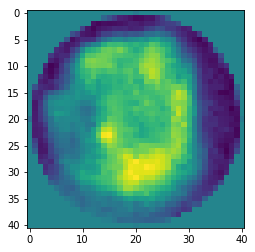

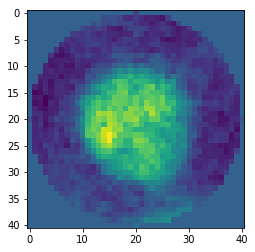

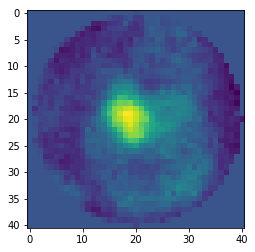

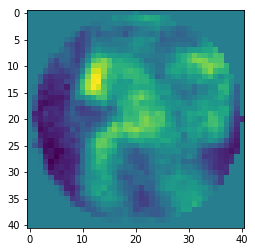

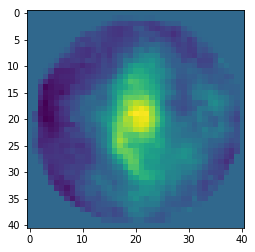

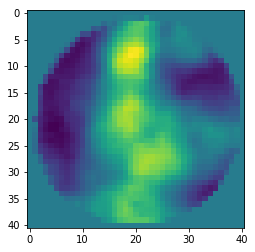

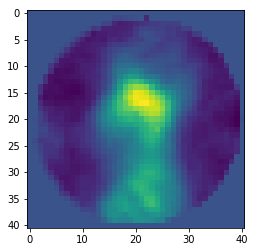

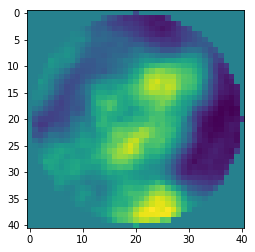

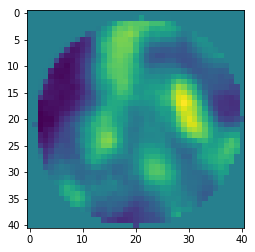

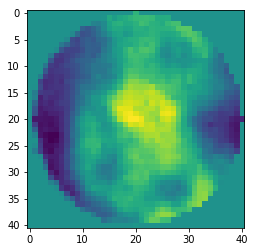

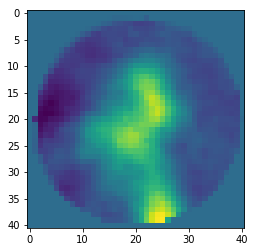

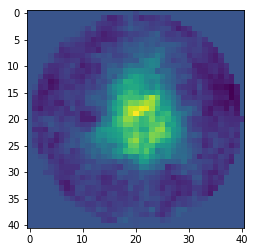

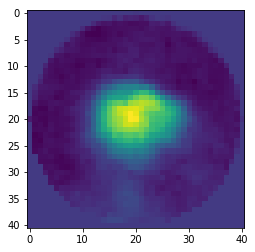

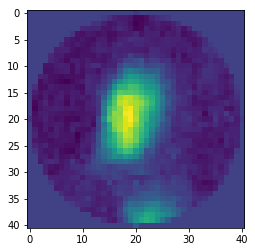

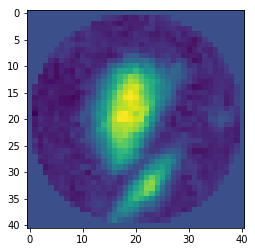

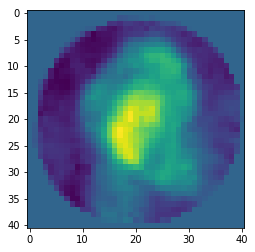

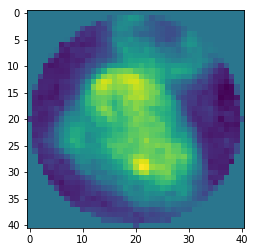

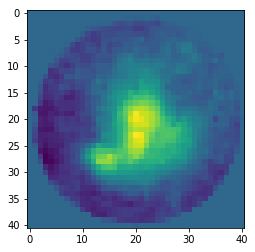

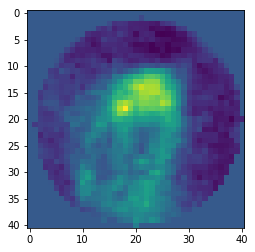

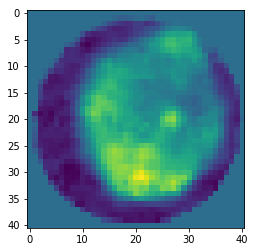

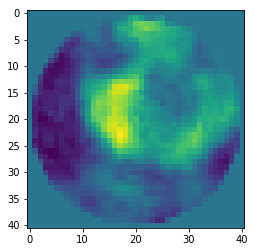

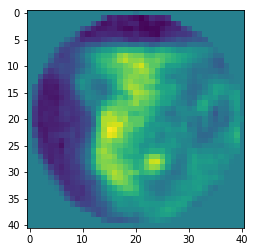

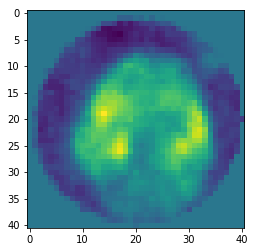

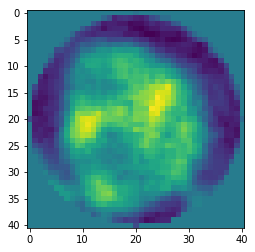

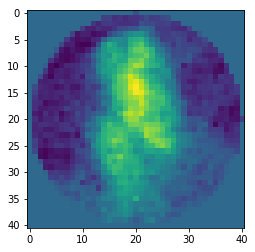

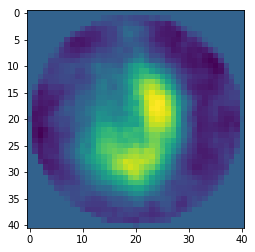

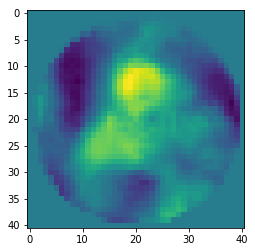

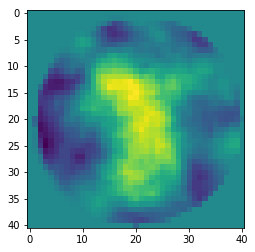

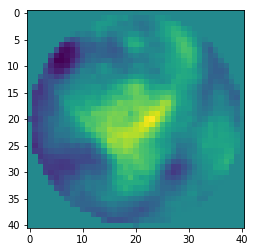

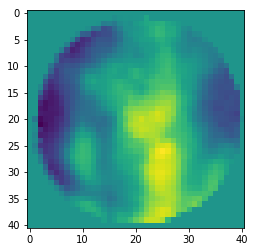

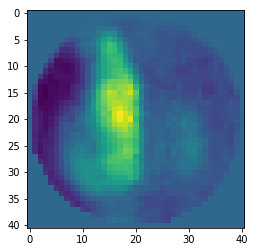

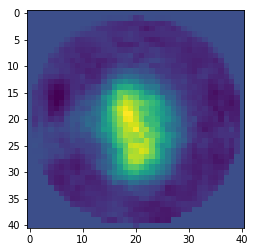

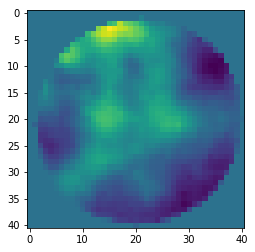

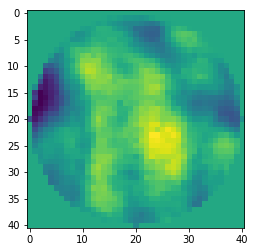

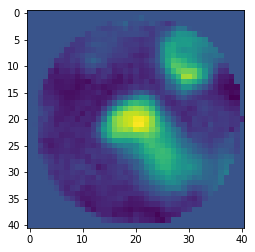

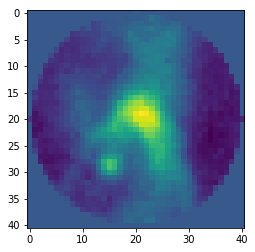

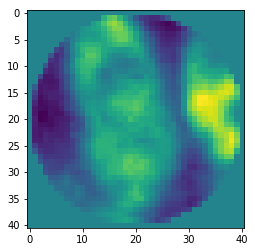

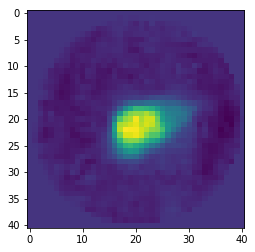

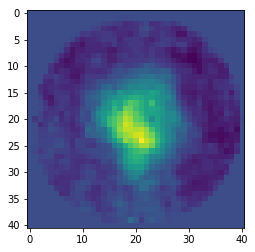

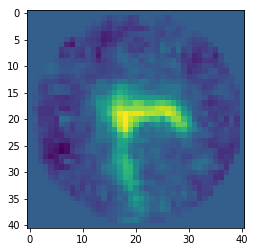

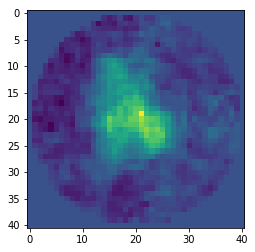

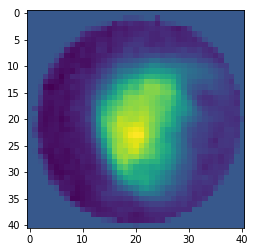

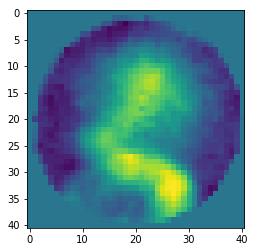

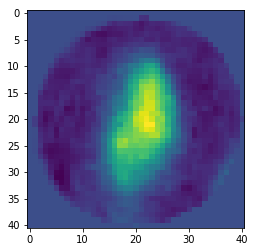

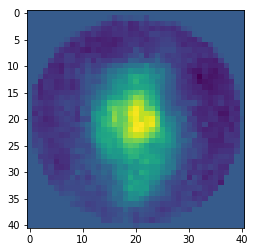

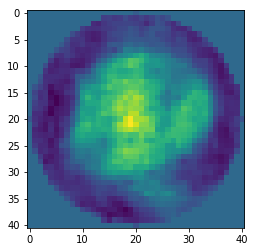

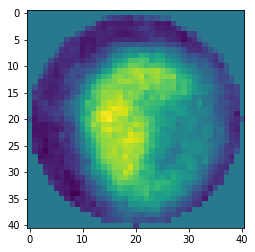

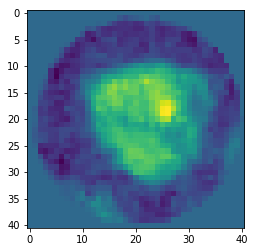

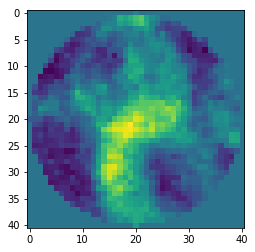

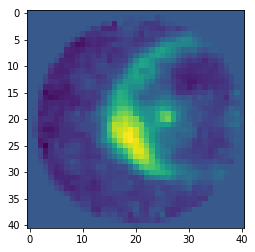

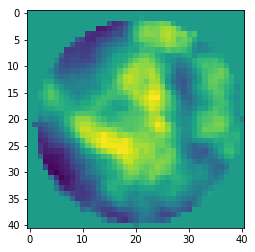

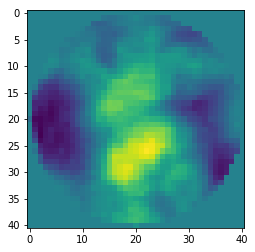

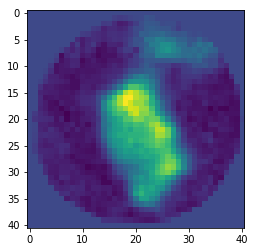

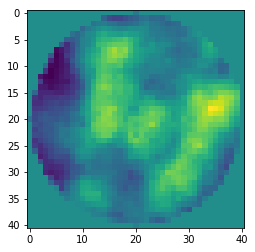

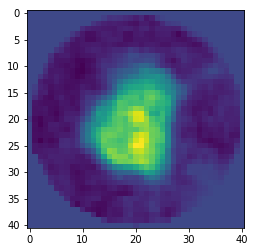

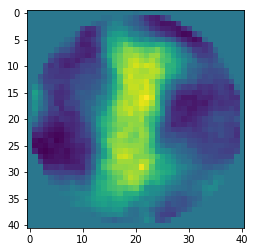

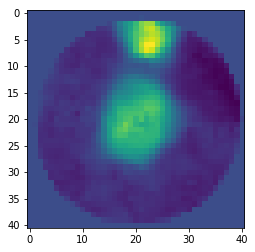

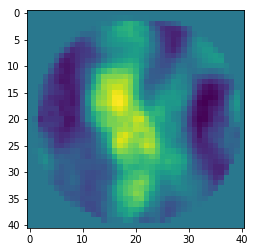

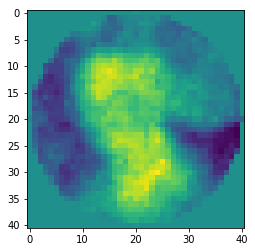

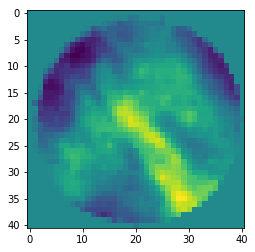

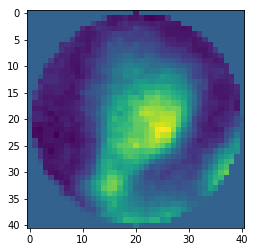

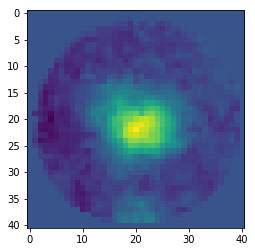

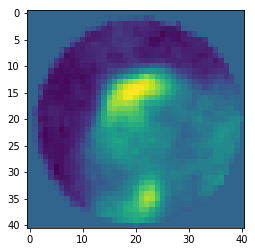

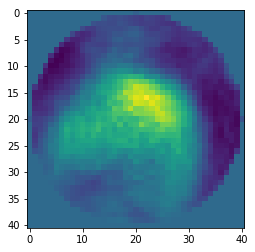

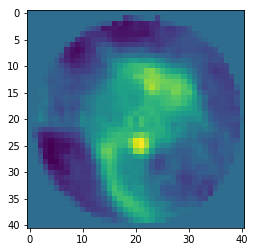

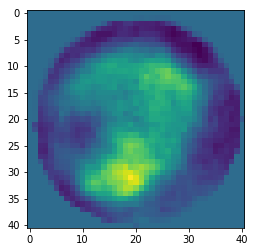

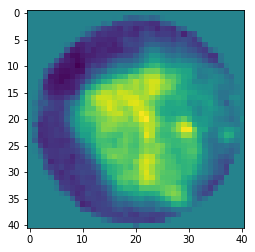

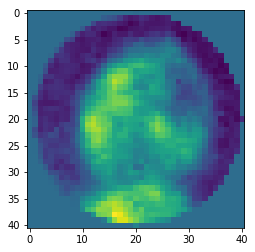

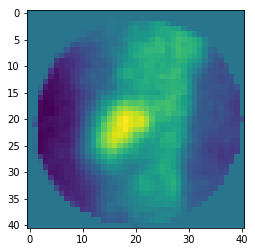

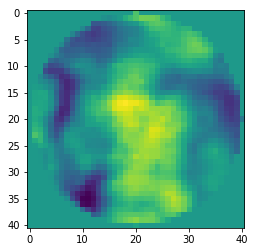

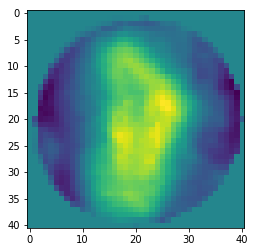

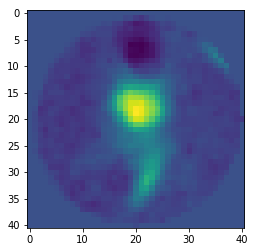

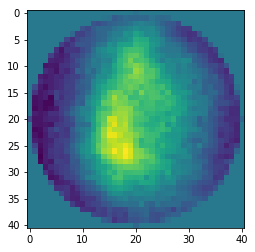

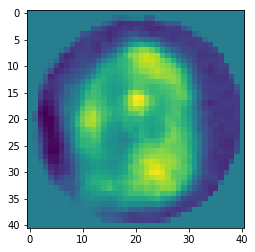

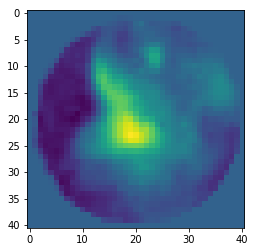

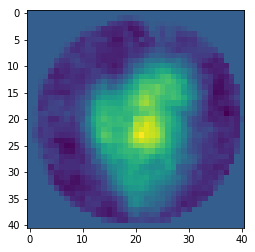

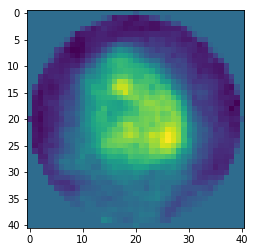

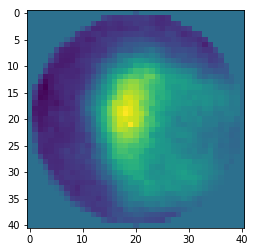

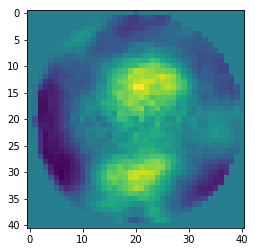

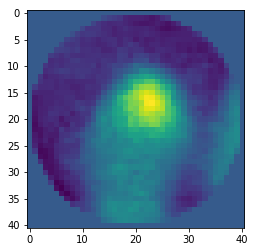

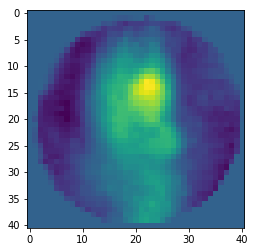

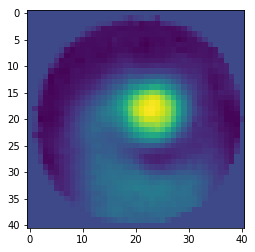

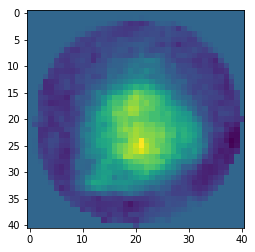

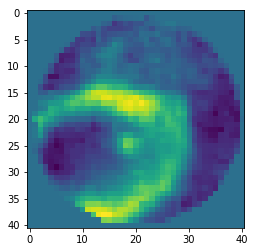

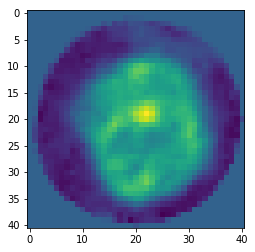

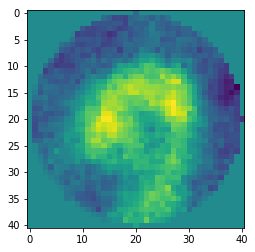

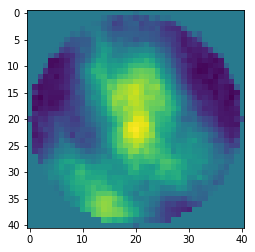

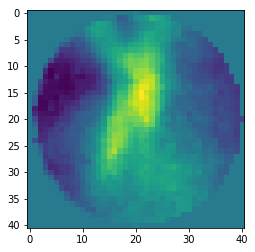

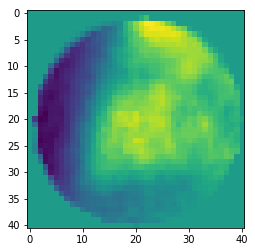

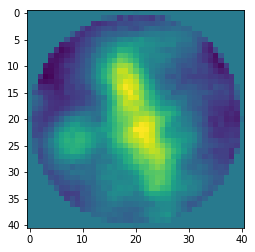

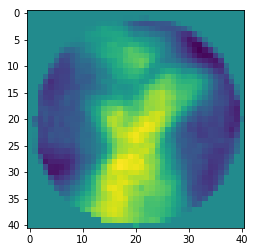

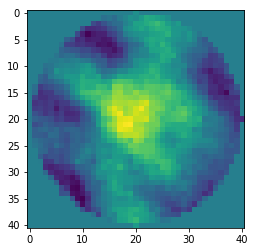

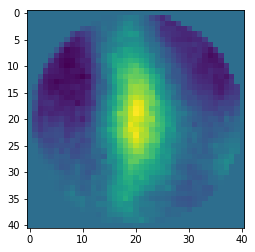

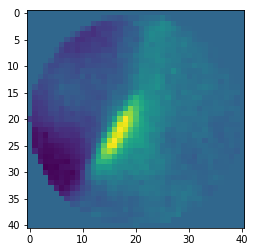

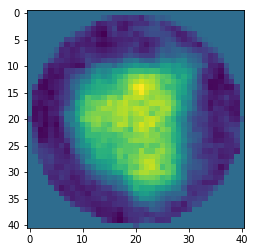

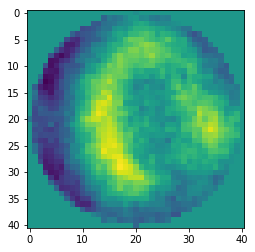

<Figure size 432x288 with 0 Axes>

In [9]:
from glob import glob
i=0
for filename in glob('/dev/shm/data/permuted*.npz'):
    handle=open(filename,'br')
    while True:
        X=np.fromfile(handle,count=_size*_size)
        print(i,X.shape)
        i+=1
        if X.shape[0]<_size*_size:
            break
        pic=X.reshape([_size,_size])
        imshow(pic)
        figure()
    print(filename,X.shape)
    break